![image.png](attachment:image.png)

## __Inicialização do Projeto__

### Importação de Bibliotecas

In [4]:
#!pip install sweetviz

In [5]:
# Importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.display import display
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import sweetviz as sv
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Carregamento do Dataframe

In [6]:
# Inicializar o dataframe
df = pd.read_csv("Base_ScoreCredito_QuantumFinance.csv", header=0, sep=";", decimal=",")

In [7]:
# Visualizar o df
df.head()

,id,idade,sexo,estado_civil,escola,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO
0,708082083,45,F,casado,graduacao,3,40,1,40.089665,3,0,0,1,1,778.0
1,708083283,58,M,solteiro,ensino fundam,0,44,1,66.557645,3,0,0,1,0,276.3
2,708084558,46,M,divorciado,doutorado,3,35,1,123.681821,6,0,0,1,1,401.0
3,708085458,34,F,solteiro,mestrado,0,22,1,19.715934,6,0,0,1,0,347.4
4,708086958,49,F,casado,mestrado,2,36,0,0.000000,3,1,437,1,2,476.0


In [8]:
# Visualizar a estrutura dos dados (linhas x colunas)
df.shape

(10127, 15)

### Identificação de variaveis quantitativas e qualitativas

In [9]:
# Identificar variáveis quantitativas e qualitativas específicas
quantitative_vars = ['idade', 'Qte_dependentes', 'tempo_ultimoservico', 'vl_salario_mil', 'vl_imovel_em_mil', 'Qte_cartoes', 'Qte_carros']
qualitative_vars = ['estado_civil', 'escola', 'trabalha', 'reg_moradia', 'casa_propria']

# Verificar as variáveis identificadas
print("Variáveis quantitativas:", quantitative_vars)
print("Variáveis qualitativas:", qualitative_vars)

Variáveis quantitativas: ['idade', 'Qte_dependentes', 'tempo_ultimoservico', 'vl_salario_mil', 'vl_imovel_em_mil', 'Qte_cartoes', 'Qte_carros']
Variáveis qualitativas: ['estado_civil', 'escola', 'trabalha', 'reg_moradia', 'casa_propria']


## __Pré-processamento__

### Adicionar Colunas

In [10]:
df['SCORE_ACIMA_500'] = df['SCORE_CREDITO']>500

![image.png](attachment:image.png)

https://www.serasa.com.br/score/blog/o-serasa-score-mudou-saiba-tudo-sobre-os-novos-criterios-de-pontuacao/

In [11]:
def classifica_score(score):
    if score >= 0 and score <= 300:
        return 0
    elif score > 300 and score <= 500:
        return 1
    elif score > 500 and score <= 700:
        return 2
    return 3

In [12]:
# Adiciona coluna de classificação do Score
df['CLASSE_SCORE'] = df['SCORE_CREDITO'].apply(lambda x: classifica_score(x))

### Mudança de tipo de dados

In [13]:
# Visualizar os tipos de dados e se há dados NaN
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10127 non-null  int64  
 1   idade                10127 non-null  int64  
 2   sexo                 10127 non-null  object 
 3   estado_civil         10127 non-null  object 
 4   escola               10127 non-null  object 
 5   Qte_dependentes      10127 non-null  int64  
 6   tempo_ultimoservico  10127 non-null  int64  
 7   trabalha             10127 non-null  int64  
 8   vl_salario_mil       10127 non-null  float64
 9   reg_moradia          10127 non-null  int64  
 10  casa_propria         10127 non-null  int64  
 11  vl_imovel_em_mil     10127 non-null  int64  
 12  Qte_cartoes          10127 non-null  int64  
 13  Qte_carros           10127 non-null  int64  
 14  SCORE_CREDITO        10127 non-null  float64
 15  SCORE_ACIMA_500      10127 non-null 

In [14]:
# Mudar os dados categóricos para 'category'
df[['sexo','estado_civil','escola','trabalha','casa_propria','SCORE_ACIMA_500','CLASSE_SCORE']] = df[['sexo','estado_civil','escola','trabalha','casa_propria','SCORE_ACIMA_500','CLASSE_SCORE']].astype("category")

In [15]:
# Checar se a mudança ocorreu bem
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   id                   10127 non-null  int64   
 1   idade                10127 non-null  int64   
 2   sexo                 10127 non-null  category
 3   estado_civil         10127 non-null  category
 4   escola               10127 non-null  category
 5   Qte_dependentes      10127 non-null  int64   
 6   tempo_ultimoservico  10127 non-null  int64   
 7   trabalha             10127 non-null  category
 8   vl_salario_mil       10127 non-null  float64 
 9   reg_moradia          10127 non-null  int64   
 10  casa_propria         10127 non-null  category
 11  vl_imovel_em_mil     10127 non-null  int64   
 12  Qte_cartoes          10127 non-null  int64   
 13  Qte_carros           10127 non-null  int64   
 14  SCORE_CREDITO        10127 non-null  float64 
 15  SCORE_ACIMA_500    

### Drop de  colunas

In [16]:
# Dropar a coluna id, pois não traz informação relevante
df.drop(columns="id", inplace=True)

<Axes: xlabel='CLASSE_SCORE', ylabel='Count'>

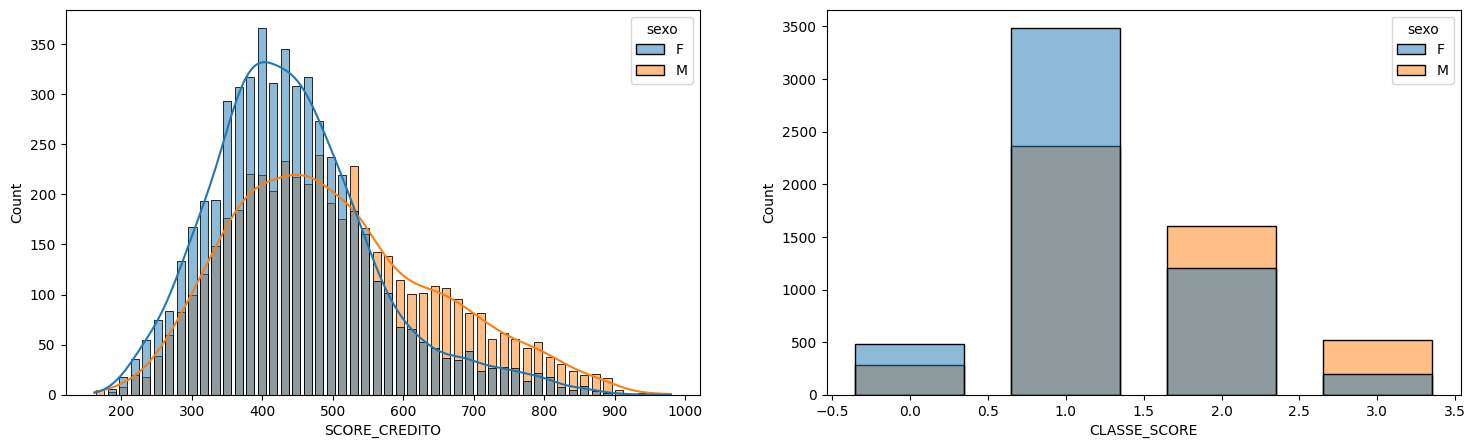

In [17]:
# Será que o sexo irá enviesar o modelo?
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(18,5))

plt.subplot(1,2,1)
sns.histplot(x='SCORE_CREDITO',data=df, hue='sexo', bins=50,shrink=.7, kde=True)
plt.subplot(1,2,2)
sns.histplot(x='CLASSE_SCORE',data=df, hue='sexo', shrink=.7)

##**Interpretação**:

* Observa-se que, para os homens (M), a distribuição parece ser um pouco mais dispersa, com uma cauda mais longa em direção a pontuações mais altas.
* Para as mulheres (F), a distribuição parece ser mais concentrada, com um pico mais pronunciado em torno de 400 a 500 pontos.
* Isso sugere que, em média, as mulheres podem ter uma pontuação de crédito mais centralizada, enquanto os homens têm uma variação maior nas pontuações de crédito.
* No desenvolvimento de modelos preditivos, é importante considerar essas diferenças para evitar viés de gênero.
* O resultado pode enviesar o modelo

<Axes: xlabel='sexo', ylabel='SCORE_CREDITO'>

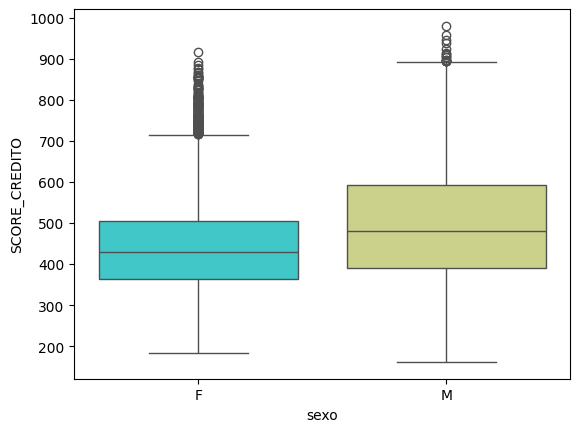

In [18]:
# Visualização dessa variação pelo boxplot
# HIPÓTESE 2: "Os homens tem mais dívidas do que as mulheres" : NÃO. As mulheres tem mediana de score menor do que os homens.
# Resposta: Mulheres têm mediana de score menor do que os homens, ou seja: Sim, irá enviesar o modelo, e irá acabar favorecendo os homens nas concessõs de crédito por conta disso.
sns.boxplot(x='sexo', y='SCORE_CREDITO', data=df, palette='rainbow')

##**Interpretação**

* Comparação de Medianas: A mediana do SCORE_CREDITO dos homens é um pouco maior do que a das mulheres, indicando que, em média, os homens têm uma pontuação de crédito ligeiramente superior.
* Dispersão dos Dados: A dispersão dos dados é maior para os homens, como visto pela amplitude do IQR e a presença de mais outliers altos. Isso sugere que há uma maior variabilidade nas pontuações de crédito dos homens em comparação com as mulheres.
* Outliers: A presença de outliers em ambos os sexos sugere que há indivíduos com pontuações de crédito bem acima do normal em ambos os grupos.

In [19]:
# O jeito seria então, dropar a coluna sexo e não utilizá-la no modelo, a fim de não enviesar os dados.
df.drop(columns='sexo', inplace=True)

### Corrigir dados

In [20]:
# Quais valores existem na coluna estado_civil?
df.estado_civil.value_counts()

estado_civil
casado        4687
solteiro      3943
na             749
divorciado     748
Name: count, dtype: int64

In [21]:
# Substituir o valor na por NaN na coluna estado_civil
df.estado_civil.replace('na', np.NaN, inplace=True)

### Checar valores faltantes

In [22]:
# Checar se funcionou
df.isna().sum()

idade                    0
estado_civil           749
escola                   0
Qte_dependentes          0
tempo_ultimoservico      0
trabalha                 0
vl_salario_mil           0
reg_moradia              0
casa_propria             0
vl_imovel_em_mil         0
Qte_cartoes              0
Qte_carros               0
SCORE_CREDITO            0
SCORE_ACIMA_500          0
CLASSE_SCORE             0
dtype: int64

In [23]:
# Calcular o porcentagem de dados faltantes (missing value)
df.isna().sum()/len(df)*100

idade                  0.00000
estado_civil           7.39607
escola                 0.00000
Qte_dependentes        0.00000
tempo_ultimoservico    0.00000
trabalha               0.00000
vl_salario_mil         0.00000
reg_moradia            0.00000
casa_propria           0.00000
vl_imovel_em_mil       0.00000
Qte_cartoes            0.00000
Qte_carros             0.00000
SCORE_CREDITO          0.00000
SCORE_ACIMA_500        0.00000
CLASSE_SCORE           0.00000
dtype: float64

### Resolver Valores Faltantes

In [24]:
# Por ser uma variável qualitativa, a melhor opção seria remover essas linhas
# Descobrir como a remoção das linhas faltantes de estado_civil irá afetar as medida estatísticas do df em cada coluna
# Resposta: Não afeta significativamente na maioria das variáveis. Apenas em 2 variáveis (Qte_dependentes e vl_imovel_em_mil) a diferença não é tão pequena.
df.describe().compare(df.dropna(axis=0,how='any').describe(), result_names=("base_original","nans_estadocivil_removidos"))

idade                            Qte_dependentes  \
      base_original nans_estadocivil_removidos   base_original   
count  10127.000000                9378.000000    10127.000000   
mean      46.325960                  46.386436        1.547447   
std        8.016814                   8.099109        1.489079   
25%             NaN                        NaN             NaN   
50%             NaN                        NaN             NaN   
75%             NaN                        NaN             NaN   

                                 tempo_ultimoservico  \
      nans_estadocivil_removidos       base_original   
count                9378.000000        10127.000000   
mean                    1.468330           34.133208   
std                     1.477177            8.221428   
25%                          NaN                 NaN   
50%                          NaN                 NaN   
75%                          NaN                 NaN   

                                 vl_salario_mil                             \
      nans_estadocivil_removidos  base_original nans_estadocivil_removidos   
count                9378.000000   10127.000000                9378.000000   
mean                   34.179249      70.209002                  70.052174   
std                     8.273774      55.567032                  55.642493   
25%                          NaN      21.330536                  21.258422   
50%                          NaN      66.486331                  66.327866   
75%                          NaN     107.544225                 107.035287   

        reg_moradia                            vl_imovel_em_mil  \
      base_original nans_estadocivil_removidos    base_original   
count  10127.000000                9378.000000     10127.000000   
mean       3.783450                   3.788868       208.999111   
std        1.580486                   1.574226       378.495229   
25%             NaN                        NaN              NaN   
50%             NaN                        NaN              NaN   
75%             NaN                        NaN       289.000000   

                                   Qte_cartoes                             \
      nans_estadocivil_removidos base_original nans_estadocivil_removidos   
count                9378.000000  10127.000000                9378.000000   
mean                  204.670186      1.083638                   1.081574   
std                   376.775198      0.333784                   0.329586   
25%                          NaN           NaN                        NaN   
50%                          NaN           NaN                        NaN   
75%                   280.750000           NaN                        NaN   

         Qte_carros                            SCORE_CREDITO  \
      base_original nans_estadocivil_removidos base_original   
count  10127.000000                9378.000000  10127.000000   
mean       0.623383                   0.613884    469.500364   
std        0.569796                   0.567401    133.814653   
25%             NaN                        NaN    375.000000   
50%             NaN                        NaN    449.600000   
75%             NaN                        NaN    540.900000   

                                  
      nans_estadocivil_removidos  
count                9378.000000  
mean                  467.048136  
std                   133.612677  
25%                   372.960000  
50%                   447.160000  
75%                   538.000000

In [25]:
# Remover linhas que possuem valores NaN
# Como estado_civil é uma variável importante (veja na seção análise de dados), não podemos remover essa coluna, e preencher com a média em uma variável qualitativa não é possível. Portanto, o jeito seria remover essas linhas.
df.dropna(axis=0,how='any',inplace=True)

In [26]:
# Checar se funcionou
df.isna().sum()

idade                  0
estado_civil           0
escola                 0
Qte_dependentes        0
tempo_ultimoservico    0
trabalha               0
vl_salario_mil         0
reg_moradia            0
casa_propria           0
vl_imovel_em_mil       0
Qte_cartoes            0
Qte_carros             0
SCORE_CREDITO          0
SCORE_ACIMA_500        0
CLASSE_SCORE           0
dtype: int64

### Remoção de outliers e análise

* O resultado do modelo não melhora removendo outliers, nós testamos de de 0.652 foi pra 0.552 a medida R²

In [27]:
df_outliers_removidos = df[(np.abs(stats.zscore(df[quantitative_vars])) < 3).all(axis=1)]

In [28]:
df.describe().compare(df_outliers_removidos.describe(), result_names=("base_original","outliers_removidos"))

idade                    Qte_dependentes                     \
      base_original outliers_removidos   base_original outliers_removidos   
count   9378.000000        8823.000000     9378.000000        8823.000000   
mean      46.386436          46.459028        1.468330           1.465828   
std        8.099109           8.101690        1.477177           1.478381   
min             NaN                NaN             NaN                NaN   
25%             NaN                NaN             NaN                NaN   
50%             NaN                NaN             NaN                NaN   
75%             NaN                NaN             NaN                NaN   
max       73.000000          70.000000             NaN                NaN   

      tempo_ultimoservico                    vl_salario_mil  \
            base_original outliers_removidos  base_original   
count         9378.000000        8823.000000    9378.000000   
mean            34.179249          34.016094      70.052174   
std              8.273774           8.190930      55.642493   
min              7.000000          10.000000            NaN   
25%             30.000000          29.000000      21.258422   
50%                   NaN                NaN      66.327866   
75%                   NaN                NaN     107.035287   
max                   NaN                NaN            NaN   

                           reg_moradia                    vl_imovel_em_mil  \
      outliers_removidos base_original outliers_removidos    base_original   
count        8823.000000   9378.000000        8823.000000      9378.000000   
mean           68.222864      3.788868           3.917828       204.670186   
std            55.103248      1.574226           1.510240       376.775198   
min                  NaN           NaN                NaN              NaN   
25%            20.960043           NaN                NaN              NaN   
50%            65.233417           NaN                NaN              NaN   
75%           104.134281           NaN                NaN       280.750000   
max                  NaN           NaN                NaN      1800.000000   

                           Qte_cartoes                       Qte_carros  \
      outliers_removidos base_original outliers_removidos base_original   
count        8823.000000   9378.000000        8823.000000   9378.000000   
mean          137.820243      1.081574           1.048963      0.613884   
std           246.318575      0.329586           0.215803      0.567401   
min                  NaN           NaN                NaN           NaN   
25%                  NaN           NaN                NaN           NaN   
50%                  NaN           NaN                NaN           NaN   
75%           231.000000           NaN                NaN           NaN   
max          1334.000000      4.000000           2.000000           NaN   

                         SCORE_CREDITO                     
      outliers_removidos base_original outliers_removidos  
count        8823.000000   9378.000000        8823.000000  
mean            0.614984    467.048136         450.954577  
std             0.568290    133.612677         118.121591  
min                  NaN           NaN                NaN  
25%                  NaN    372.960000         368.100000  
50%                  NaN    447.160000         438.480000  
75%                  NaN    538.000000         520.200000  
max                  NaN    979.650000         958.650000

##**Interpretação**

- Seria interessante remover os outliers ou deixamos df como está?

## __Estatística Descritiva__

### SweetViz

In [29]:
# Report do SweetViz
my_report = sv.analyze(df)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Describe

In [30]:
# Medidas estatísticas do df
df.describe(include='all').round(2)

,idade,estado_civil,escola,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO,SCORE_ACIMA_500,CLASSE_SCORE
count,9378.00,9378,9378,9378.00,9378.00,9378.0,9378.00,9378.00,9378.0,9378.00,9378.00,9378.00,9378.00,9378,9378.0
unique,NaN,3,5,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2,4.0
top,NaN,casado,ensino medio,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,False,1.0
freq,NaN,4687,3104,NaN,NaN,8548.0,NaN,NaN,6139.0,NaN,NaN,NaN,NaN,6197,5469.0
mean,46.39,NaN,NaN,1.47,34.18,NaN,70.05,3.79,NaN,204.67,1.08,0.61,467.05,NaN,NaN
std,8.10,NaN,NaN,1.48,8.27,NaN,55.64,1.57,NaN,376.78,0.33,0.57,133.61,NaN,NaN
min,26.00,NaN,NaN,0.00,7.00,NaN,0.00,1.00,NaN,0.00,1.00,0.00,162.00,NaN,NaN
25%,41.00,NaN,NaN,0.00,30.00,NaN,21.26,3.00,NaN,0.00,1.00,0.00,372.96,NaN,NaN
50%,46.00,NaN,NaN,1.00,34.00,NaN,66.33,4.00,NaN,0.00,1.00,1.00,447.16,NaN,NaN
75%,52.00,NaN,NaN,3.00,39.00,NaN,107.04,5.00,NaN,280.75,1.00,1.00,538.00,NaN,NaN


### Countplot

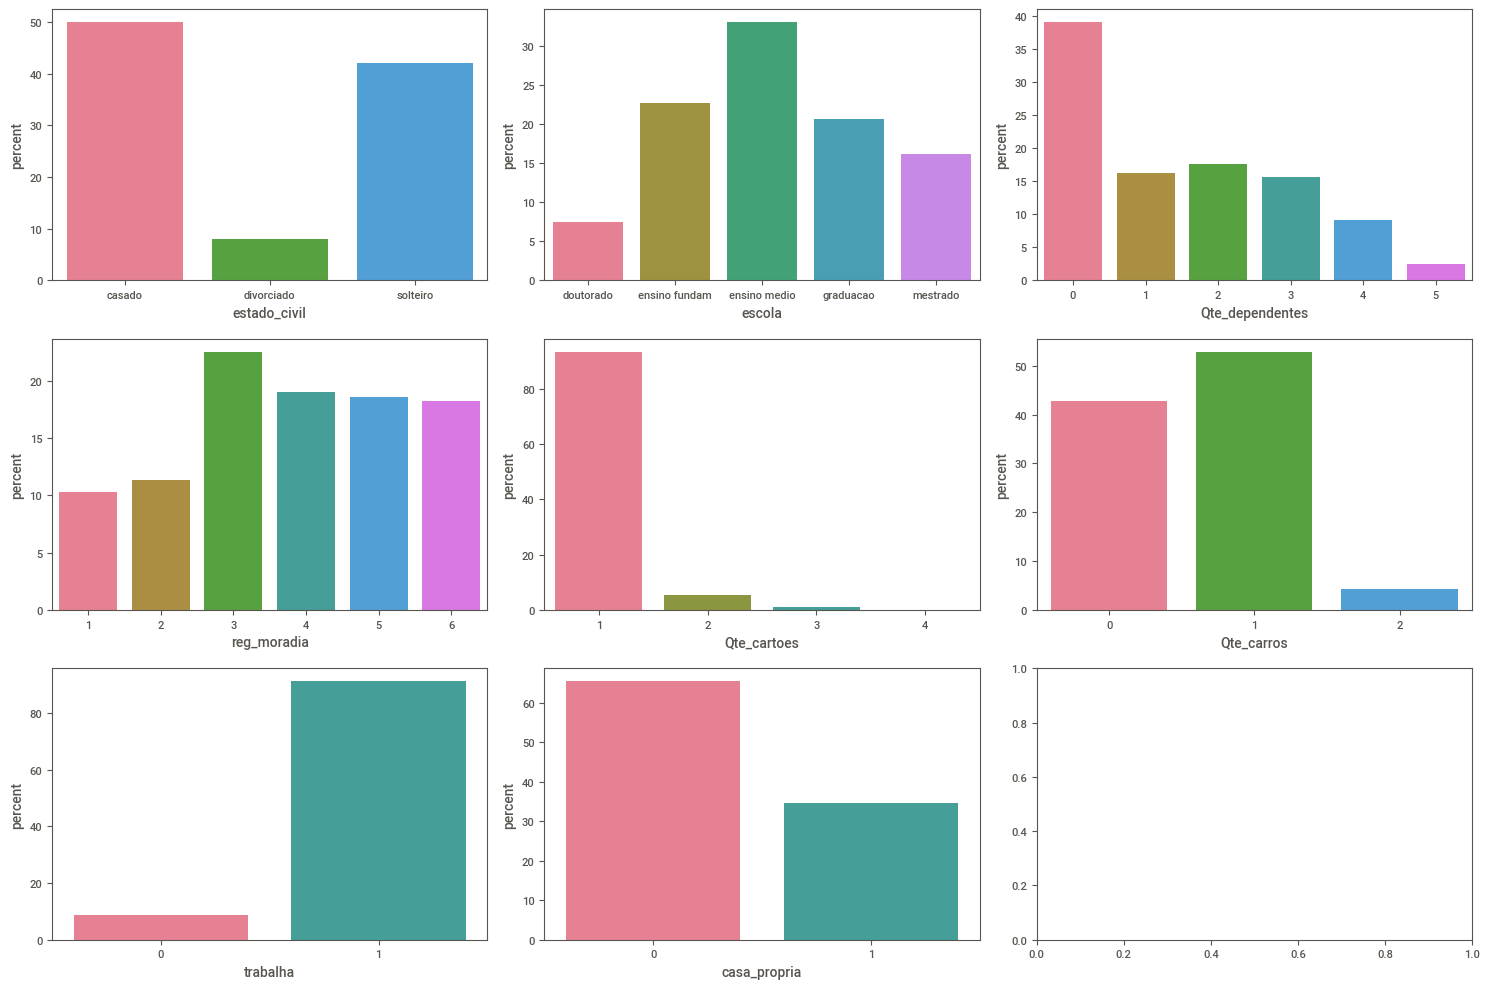

In [31]:
# Verificar a contagem de cada uma das classes dessas variáveis
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(15,10))

for i, coluna in zip(range(1,10), ["estado_civil","escola","Qte_dependentes","reg_moradia","Qte_cartoes","Qte_carros","trabalha","casa_propria"]):
    plt.subplot(3,3,i)
    sns.countplot(data=df, x=coluna, stat='percent', palette="husl")

plt.tight_layout()

### Boxplot

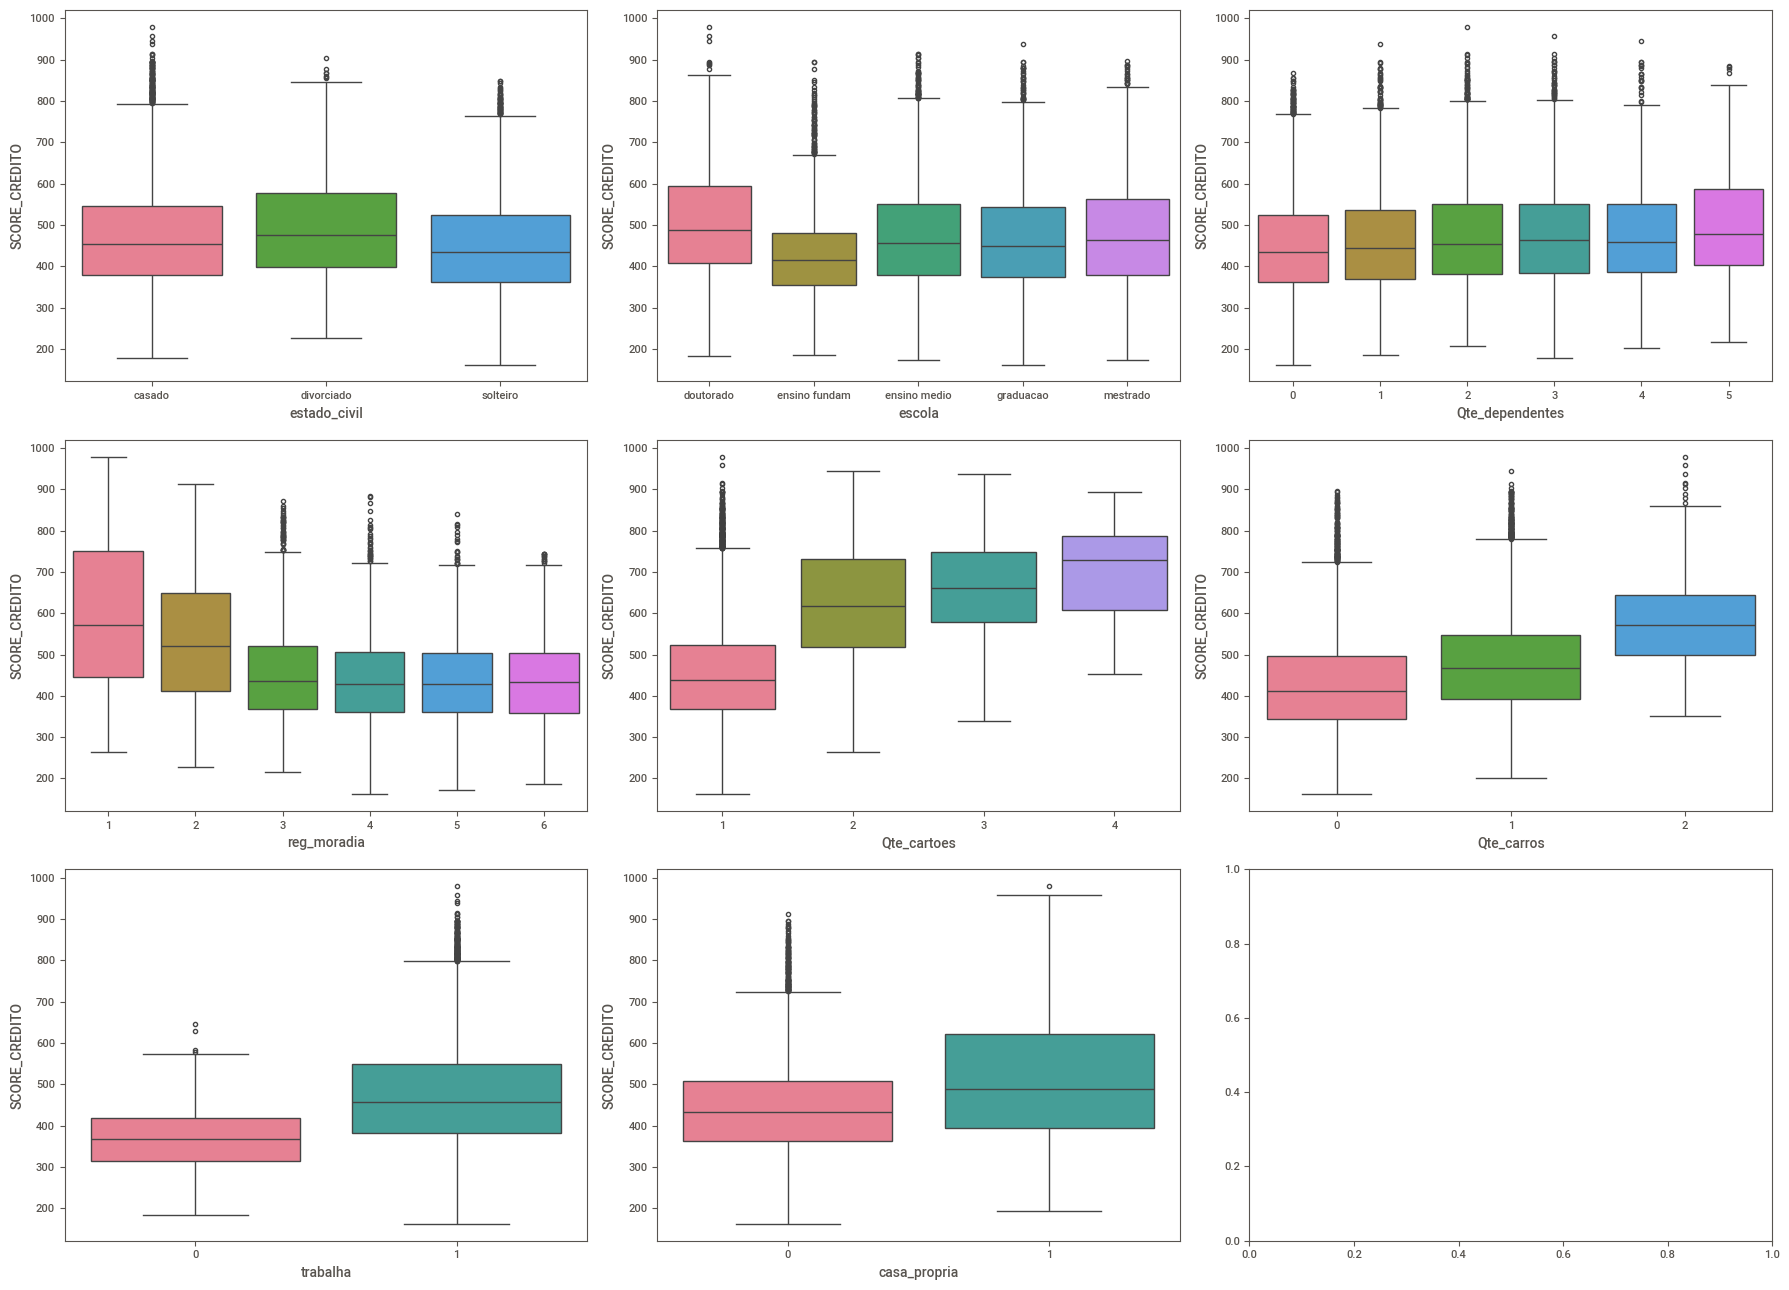

In [32]:
# Identificar se há associação entre algumas variáveis e 'SCORE_CREDITO'
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(18,13))

for i, coluna in zip(range(1,10), ["estado_civil","escola","Qte_dependentes","reg_moradia","Qte_cartoes","Qte_carros","trabalha","casa_propria"]):
    plt.subplot(3,3,i)
    sns.boxplot(data=df, x=coluna, y="SCORE_CREDITO", palette="husl")

plt.tight_layout()

### Pairplot

## __Análises de Variável__

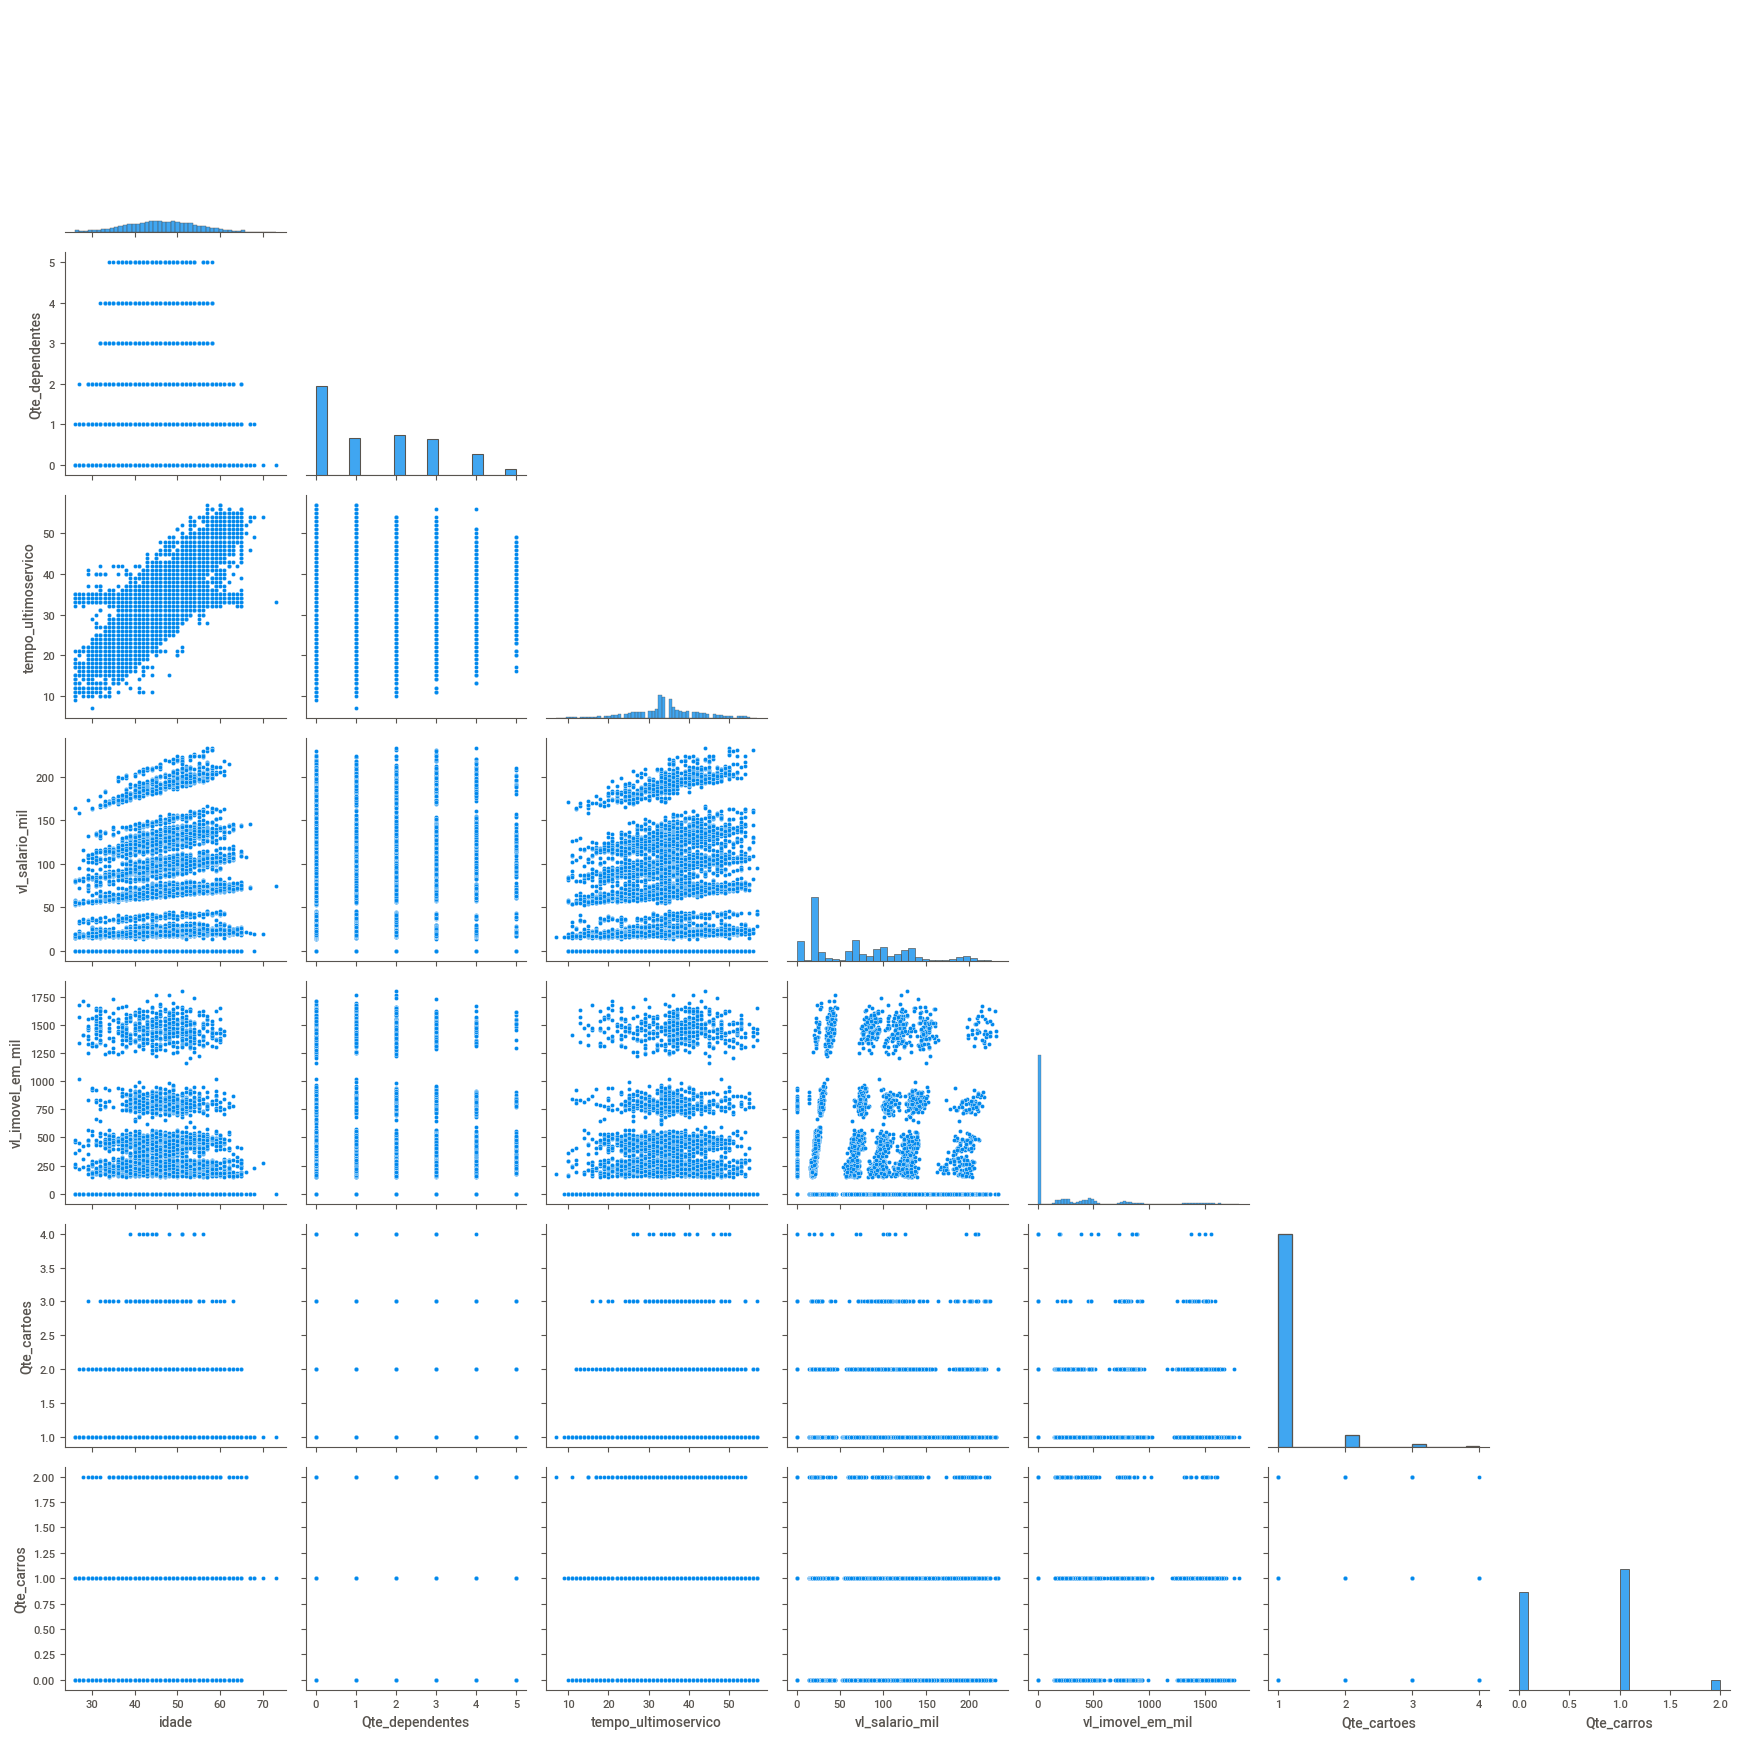

In [33]:
sns.pairplot(df[quantitative_vars+["CLASSE_SCORE"]], corner=True)

plt.tight_layout()

### Variável: idade

<Axes: xlabel='CLASSE_SCORE', ylabel='idade'>

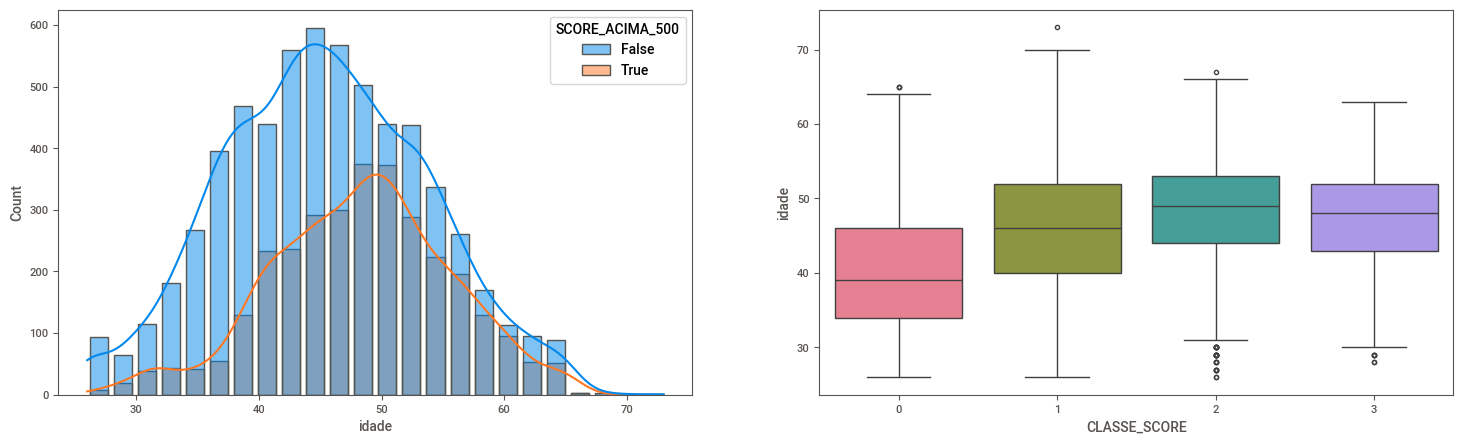

In [34]:
# Distribuição da variável idade
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(18,5))

plt.subplot(1,2,1)
sns.histplot(x='idade',data=df, hue='SCORE_ACIMA_500', bins=24,shrink=.75, kde=True)
plt.subplot(1,2,2)
sns.boxplot(x='CLASSE_SCORE', y='idade',data=df, palette="husl")

##**Interpretação**

* Para clientes com SCORE_ACIMA_500 (True), a distribuição é ligeiramente deslocada para a direita, com um pico também em torno dos 50 anos, mas com uma presença notável até cerca de 60 anos.
* Isso sugere que clientes mais velhos tendem a ter um score de crédito mais alto.

**Perfil Etário dos Clientes:**

* A maior concentração de clientes na faixa dos 50 anos indica que a maioria dos clientes tem experiência financeira acumulada, o que pode influenciar positivamente no score de crédito.
* Clientes mais jovens (30-40 anos) têm maior presença em classes de score mais baixas, indicando que a idade pode ser um fator importante na avaliação do risco de crédito.

**Relação entre Idade e Score de Crédito:**

* A análise sugere que clientes mais velhos tendem a ter scores de crédito mais altos (SCORE_ACIMA_500). Isso pode ser devido à estabilidade financeira alcançada com a idade, histórico de crédito mais longo e talvez menor propensão a assumir novos riscos financeiros.
* As classes de score (0 a 3) mostram uma tendência de aumento da idade com o aumento da classe, sugerindo que a idade é um fator relevante na modelagem do score de crédito.

**Modelagem:**

* A idade deve ser considerada uma variável importante nos modelos preditivos de score de crédito. A inclusão desta variável pode melhorar a precisão do modelo, especialmente se combinada com outras variáveis demográficas e financeiras.

In [35]:
# Describe de idade
df.idade.describe().round(2)

count    9378.00
mean       46.39
std         8.10
min        26.00
25%        41.00
50%        46.00
75%        52.00
max        73.00
Name: idade, dtype: float64

<Axes: ylabel='idade'>

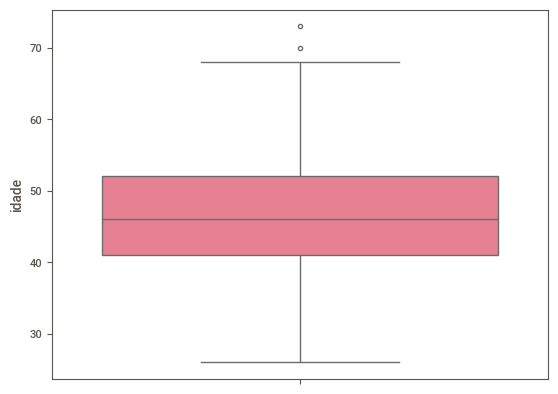

In [36]:
# Tem outliers?
sns.boxplot(data=df, y='idade', palette="husl")

In [37]:
#Cálculo dos quartis, limites e amplitude inter-quartil
Q1 = np.percentile(df['idade'], 25)
Q2 = np.percentile(df['idade'], 50)
Q3 = np.percentile(df['idade'], 75)
IQ = Q3 - Q1

limite1 = Q3+3*IQ
limite2 = Q3+1.5*IQ
limite3=Q1-1.5*IQ
limite4 = Q1-3*IQ

In [38]:
# Criar uma variável outlier_idade no Data Frame, sendo 0 = não outlier, 1= outlier e 2 = ponto extremo
df.loc[(df.idade >= limite2) & (df.idade <= limite1), 'outlier_idade']=1
df.loc[(df.idade > limite1) | (df.idade < limite4) , 'outlier_idade']=2
df.loc[(df.idade >= limite4) & (df.idade <= limite3) , 'outlier_idade']=1
df.loc[(df.idade > limite3) & (df.idade < limite2), 'outlier_idade']=0

In [39]:
# Checar outliers
df["outlier_idade"].value_counts()

outlier_idade
0.0    9376
1.0       2
Name: count, dtype: int64

In [40]:
########### IDADE ORIGINAL ############
print('Mínimo = ', min(df['idade']))
print('Máximo = ', max(df['idade']))
print('Média = ', (df['idade']).mean())
print('STD = ', df['idade'].std())
print('Coeficiente de Variação = ', (df['idade'].std() / df['idade'].mean()))
print('Mediana = ', (df['idade']).median())

Mínimo =  26
Máximo =  73
Média =  46.386436340371084
STD =  8.099108517756296
Coeficiente de Variação =  0.17460079188509406
Mediana =  46.0


In [41]:
########### IDADE SEM OUTLIERS ############
idadeSemOutlier = df.loc[df.outlier_idade == 0.0]
print('Mínimo = ', min(idadeSemOutlier['idade']))
print('Máximo = ', max(idadeSemOutlier['idade']))
print('Média = ', (idadeSemOutlier['idade']).mean())
print('STD = ', idadeSemOutlier['idade'].std())
print('Coeficiente de Variação = ', (idadeSemOutlier['idade'].std() / idadeSemOutlier['idade'].mean()))
print('Mediana = ', (idadeSemOutlier['idade']).median())

Mínimo =  26
Máximo =  68
Média =  46.38107935153584
STD =  8.091631255246126
Coeficiente de Variação =  0.17445974454189117
Mediana =  46.0


In [42]:
# Análise: São apenas 2, não são tão agressivos para o modelo
# Dropar variável criada
df.drop(columns='outlier_idade', inplace=True)

### Variável: casa_propria

In [43]:
# Contagem de valores 0 nas colunas casa_propria e vl_imovel_em_mil (onde não houver casa própria, o valor do imóvel será 0 consequentemente)
df.casa_propria.value_counts(normalize=True)

casa_propria
0    0.654617
1    0.345383
Name: proportion, dtype: float64

<Axes: xlabel='casa_propria', ylabel='percent'>

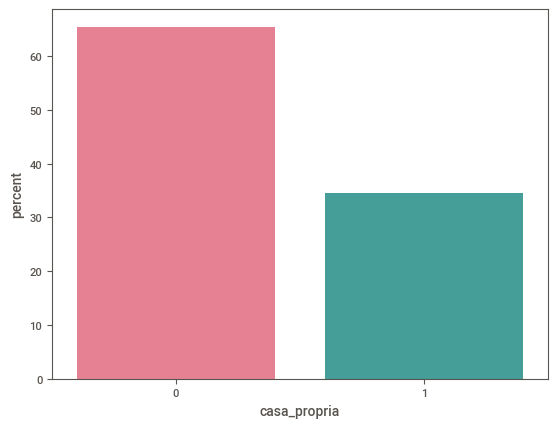

In [44]:
# Quase 65% da base não têm casa própria, devemos validar se vale a pena manter essas 2 colunas, ou pelo menos deixar apenas a casa_propria, já que os  valores 0 na coluna vl_imovel_em_mil atuariam como NaN
sns.countplot(x='casa_propria',data=df,stat='percent', palette="husl")

<Axes: xlabel='CLASSE_SCORE', ylabel='Count'>

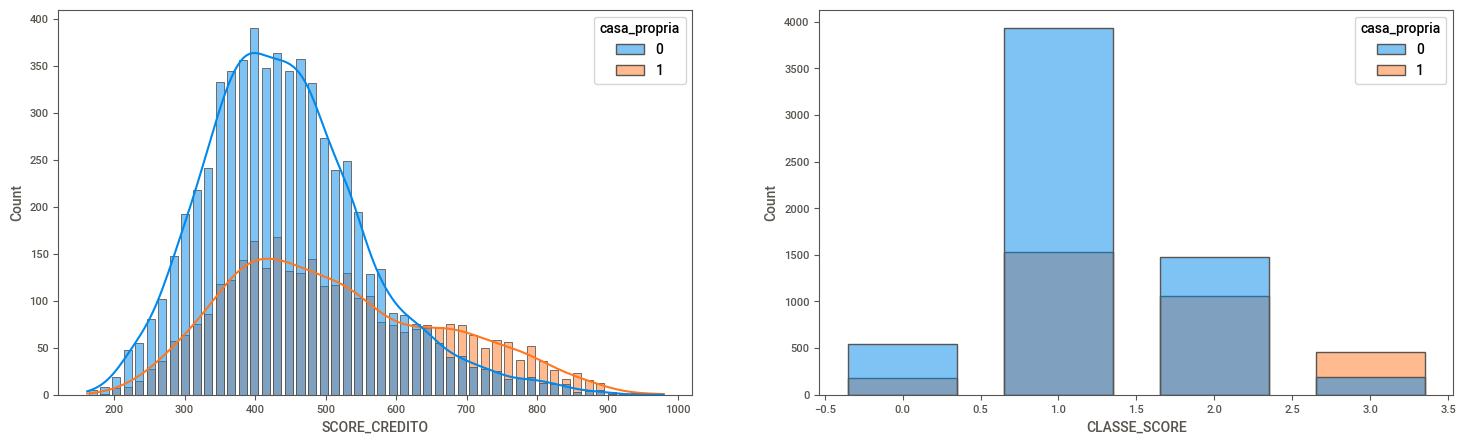

In [45]:
# Qual a relação de casa_propria com o SCORE?
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(18,5))

plt.subplot(1,2,1)
sns.histplot(x='SCORE_CREDITO',data=df, hue='casa_propria', bins=50,shrink=.7, kde=True)
plt.subplot(1,2,2)
sns.histplot(x='CLASSE_SCORE',data=df, hue='casa_propria', shrink=.7)

##**Interpretação**

* Observa-se que clientes com casa própria tendem a ter scores de crédito ligeiramente mais altos, conforme a curva de densidade laranja mostra uma presença maior em pontuações acima de 500 pontos.
* A posse de casa própria parece ser um indicativo de melhores condições de crédito. Clientes que possuem casa própria tendem a ter scores de crédito mais altos, o que pode refletir uma maior estabilidade financeira e capacidade de cumprir compromissos financeiros.
* Este é um insight importante para a modelagem preditiva, pois a variável casa_propria pode ser um forte preditor do score de crédito.
* Empresas de crédito podem considerar a posse de casa própria como um fator positivo ao avaliar o risco de crédito de um cliente. Isso pode ajudar a diferenciar entre clientes com perfis de risco semelhantes, oferecendo melhores condições de crédito para aqueles com ativos.
* No entanto, é importante considerar a equidade no modelo, garantindo que a posse de casa própria não seja um critério discriminatório contra aqueles que não possuem, mas ainda são bons pagadores.


<Axes: xlabel='casa_propria', ylabel='SCORE_CREDITO'>

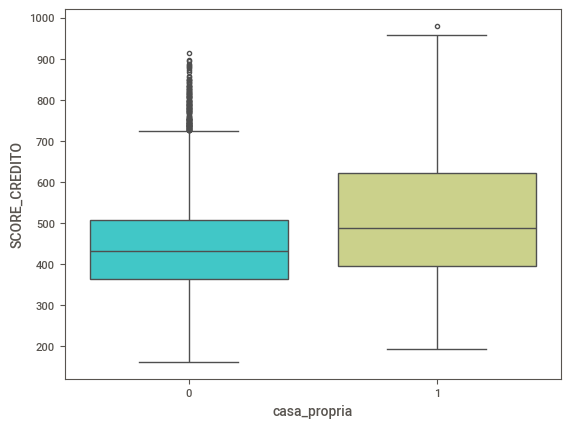

In [46]:
# Resposta: Quem não tem casa própria tem mediana de score mais baixo do que aqueles que têm
sns.boxplot(x='casa_propria',data=df, y='SCORE_CREDITO', palette='rainbow')

### Variável: trabalha

In [47]:
# Contagem de valores 0 nas colunas trabalha e vl_salario_mil (onde não houver trabalho, o valor do salário será 0 consequentemente)
print(df.trabalha.value_counts())
df.trabalha.value_counts(normalize=True)

trabalha
1    8548
0     830
Name: count, dtype: int64


trabalha
1    0.911495
0    0.088505
Name: proportion, dtype: float64

<Axes: xlabel='trabalha', ylabel='percent'>

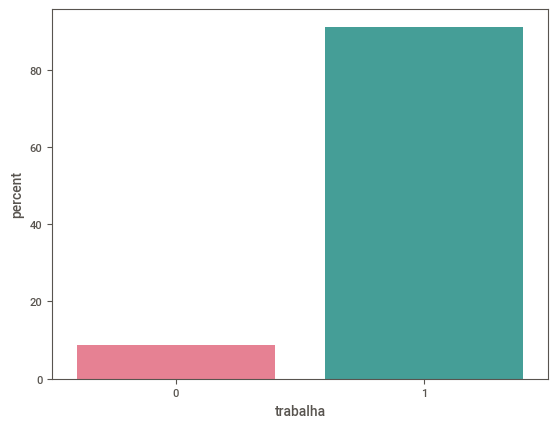

In [48]:
# Diferentemente da coluna casa_propria, apenas menos de 10% da base não trabalham
sns.countplot(x='trabalha',data=df,stat='percent', palette="husl")

<Axes: xlabel='CLASSE_SCORE', ylabel='Count'>

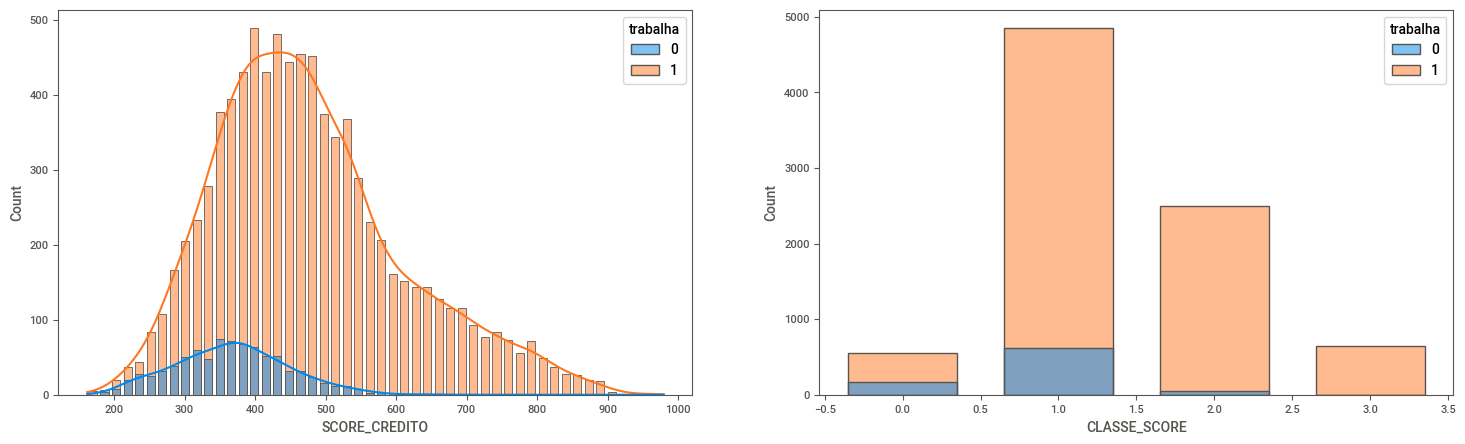

In [49]:
# Pergunta: Será que essa diferença vai afetar o modelo?
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(18,5))

plt.subplot(1,2,1)
sns.histplot(x='SCORE_CREDITO',data=df, hue='trabalha', bins=50,shrink=.7, kde=True)
plt.subplot(1,2,2)
sns.histplot(x='CLASSE_SCORE',data=df, hue='trabalha', shrink=.7)

##**Interpretação**

* A variável "trabalha" é um forte indicador de melhor condição de crédito. Clientes que estão empregados tendem a ter scores de crédito mais altos, o que pode refletir uma maior capacidade de pagamento e estabilidade financeira.

* Este é um insight crucial para a modelagem preditiva, pois a variável trabalha pode ser um forte preditor do score de crédito.

<Axes: xlabel='trabalha', ylabel='SCORE_CREDITO'>

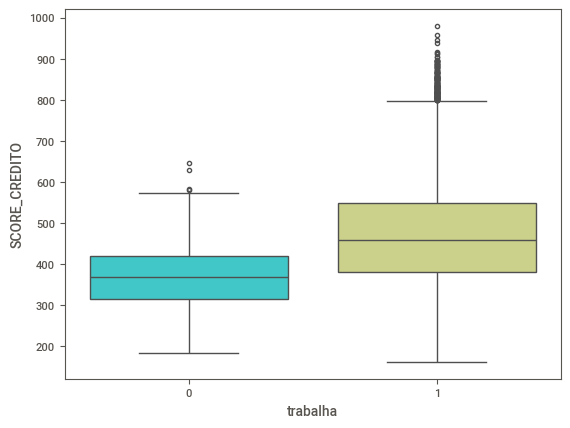

In [50]:
# Resposta: Quem não trabalha, tem mediana de score mais baixo, mas as classes estão muito desbalanceadas em quantidade e isso pode enviesar os dados, a menos que dropemos a coluna 'trabalha' e dropemos as linhas que são 0 em 'vl_salario_mil', pois atuariam como NaN
# HIPÓTESE 1: "Os desempregados tem maior propensão a não conseguir arcar com suas dívidas." : VERDADEIRO.
sns.boxplot(x='trabalha',data=df, y='SCORE_CREDITO', palette='rainbow')

### Variável: SCORE_CREDITO

<Axes: xlabel='SCORE_CREDITO', ylabel='Count'>

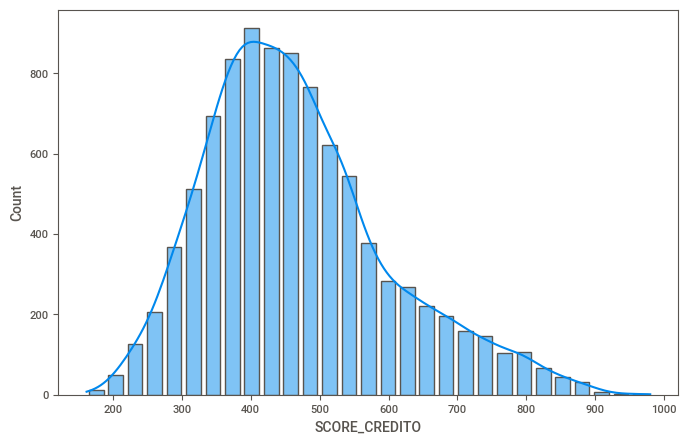

In [51]:
# Verificar a aparência do histograma do Score, para saber se segue uma normal
plt.figure(figsize=(8,5))
sns.histplot(x='SCORE_CREDITO',data=df, bins=29,shrink=.75, kde=True)

### Variável: SCORE_ACIMA_500

In [52]:
# Contagem de valores
print(df.SCORE_ACIMA_500.value_counts())
df.SCORE_ACIMA_500.value_counts(normalize=True)

SCORE_ACIMA_500
False    6197
True     3181
Name: count, dtype: int64


SCORE_ACIMA_500
False    0.660802
True     0.339198
Name: proportion, dtype: float64

<Axes: xlabel='SCORE_ACIMA_500', ylabel='percent'>

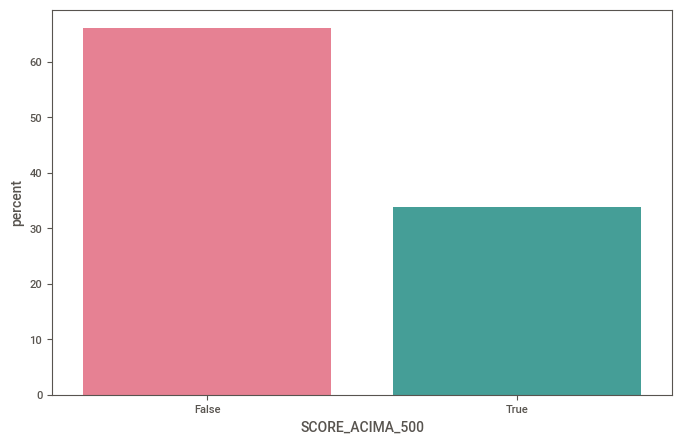

In [53]:
# Countplot de SCORE_ACIMA_500
plt.figure(figsize=(8,5))
sns.countplot(x='SCORE_ACIMA_500',data=df,stat='percent', palette="husl")

### Variável: CLASSE_SCORE

In [54]:
# Contagem de valores
print(df.CLASSE_SCORE.value_counts())
df.CLASSE_SCORE.value_counts(normalize=True)

CLASSE_SCORE
1    5469
2    2535
0     728
3     646
Name: count, dtype: int64


CLASSE_SCORE
1    0.583173
2    0.270313
0    0.077628
3    0.068885
Name: proportion, dtype: float64

<Axes: xlabel='CLASSE_SCORE', ylabel='percent'>

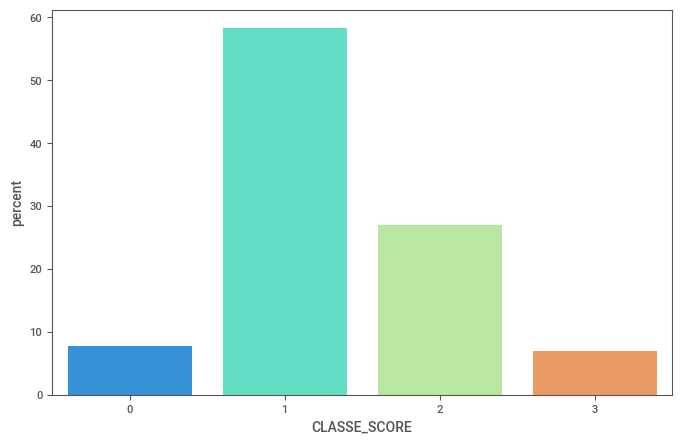

In [55]:
# Verificar as características de cada classe do Score
plt.figure(figsize=(8,5))
sns.countplot(x='CLASSE_SCORE',data=df,stat='percent',palette='rainbow')

<Axes: xlabel='CLASSE_SCORE', ylabel='SCORE_CREDITO'>

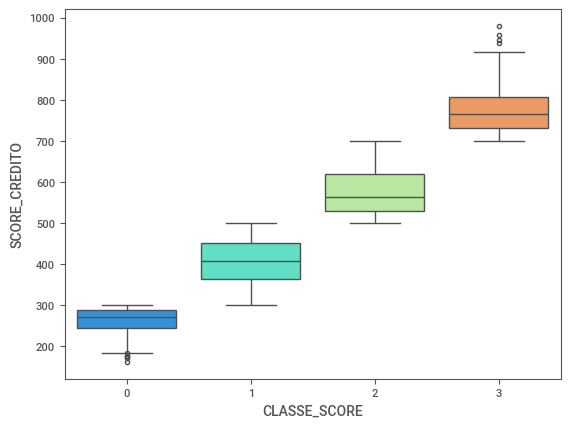

In [56]:
# Boxplot de CLASSE_SCORE
sns.boxplot(x='CLASSE_SCORE',data=df, y='SCORE_CREDITO', palette='rainbow')

## __6) Análise bivariada das variáveis qualitativas__

### a) Tabela de frequência bivariada

#### CLASSE_SCORE vs estado_civil

In [57]:
cross_tab_estado_civil = pd.crosstab(index=df['CLASSE_SCORE'], columns=df['estado_civil'],margins=True,margins_name="Total")
cross_tab_estado_civil

estado_civil,casado,divorciado,solteiro,Total
CLASSE_SCORE,,,,
0,321,33,374,728
1,2684,408,2377,5469
2,1296,233,1006,2535
3,386,74,186,646
Total,4687,748,3943,9378


In [58]:
cross_tab_prop_estado_civil = pd.crosstab(index=df['CLASSE_SCORE'], columns=df['estado_civil'],margins=True,normalize="index",margins_name="Total")
cross_tab_prop_estado_civil

estado_civil,casado,divorciado,solteiro
CLASSE_SCORE,,,
0,0.440934,0.045330,0.513736
1,0.490766,0.074602,0.434632
2,0.511243,0.091913,0.396844
3,0.597523,0.114551,0.287926
Total,0.499787,0.079761,0.420452


#### CLASSE_SCORE vs escola

In [59]:
cross_tab_escola = pd.crosstab(index=df['CLASSE_SCORE'], columns=df['escola'],margins=True,margins_name="Total")
cross_tab_escola

escola,doutorado,ensino fundam,ensino medio,graduacao,mestrado,Total
CLASSE_SCORE,,,,,,
0,28,205,237,154,104,728
1,354,1530,1695,1095,795,5469
2,233,335,924,550,493,2535
3,82,57,248,134,125,646
Total,697,2127,3104,1933,1517,9378


In [60]:
cross_tab_prop_escola = pd.crosstab(index=df['CLASSE_SCORE'], columns=df['escola'],margins=True,normalize="index",margins_name="Total")
cross_tab_prop_escola

escola,doutorado,ensino fundam,ensino medio,graduacao,mestrado
CLASSE_SCORE,,,,,
0,0.038462,0.281593,0.325549,0.211538,0.142857
1,0.064728,0.279759,0.309929,0.200219,0.145365
2,0.091913,0.132150,0.364497,0.216963,0.194477
3,0.126935,0.088235,0.383901,0.207430,0.193498
Total,0.074323,0.226807,0.330987,0.206121,0.161762


#### CLASSE_SCORE vs trabalha

In [61]:
cross_tab_trabalha = pd.crosstab(index=df['CLASSE_SCORE'], columns=df['trabalha'],margins=True,margins_name="Total")
cross_tab_trabalha

trabalha,0,1,Total
CLASSE_SCORE,,,
0,170,558,728
1,617,4852,5469
2,43,2492,2535
3,0,646,646
Total,830,8548,9378


In [62]:
cross_tab_prop_trabalha = pd.crosstab(index=df['CLASSE_SCORE'], columns=df['trabalha'],margins=True,normalize="index",margins_name="Total")
cross_tab_prop_trabalha

trabalha,0,1
CLASSE_SCORE,,
0,0.233516,0.766484
1,0.112818,0.887182
2,0.016963,0.983037
3,0.000000,1.000000
Total,0.088505,0.911495


#### CLASSE_SCORE vs reg_moradia

In [63]:
cross_tab_reg_moradia = pd.crosstab(index=df['CLASSE_SCORE'], columns=df['reg_moradia'],margins=True,margins_name="Total")
cross_tab_reg_moradia

reg_moradia,1,2,3,4,5,6,Total
CLASSE_SCORE,,,,,,,
0,14,50,162,195,150,157,728
1,338,430,1327,1117,1143,1114,5469
2,310,430,537,425,415,418,2535
3,307,150,88,47,33,21,646
Total,969,1060,2114,1784,1741,1710,9378


In [64]:
cross_tab_prop_reg_moradia = pd.crosstab(index=df['CLASSE_SCORE'], columns=df['reg_moradia'],margins=True,normalize="index",margins_name="Total")
cross_tab_prop_reg_moradia

reg_moradia,1,2,3,4,5,6
CLASSE_SCORE,,,,,,
0,0.019231,0.068681,0.222527,0.267857,0.206044,0.215659
1,0.061803,0.078625,0.242640,0.204242,0.208996,0.203694
2,0.122288,0.169625,0.211834,0.167653,0.163708,0.164892
3,0.475232,0.232198,0.136223,0.072755,0.051084,0.032508
Total,0.103327,0.113030,0.225421,0.190232,0.185647,0.182342


#### CLASSE_SCORE vs casa_propria

In [65]:
cross_tab_casa_propria = pd.crosstab(index=df['CLASSE_SCORE'], columns=df['casa_propria'],margins=True,margins_name="Total")
cross_tab_casa_propria

casa_propria,0,1,Total
CLASSE_SCORE,,,
0,549,179,728
1,3933,1536,5469
2,1472,1063,2535
3,185,461,646
Total,6139,3239,9378


In [66]:
cross_tab_prop_casa_propria = pd.crosstab(index=df['CLASSE_SCORE'], columns=df['casa_propria'],margins=True,normalize="index",margins_name="Total")
cross_tab_prop_casa_propria

casa_propria,0,1
CLASSE_SCORE,,
0,0.754121,0.245879
1,0.719144,0.280856
2,0.580671,0.419329
3,0.286378,0.713622
Total,0.654617,0.345383


### b) Teste qui-quadrado

In [67]:
# importar as bibliotecas do teste qui-quadrado
from scipy.stats import chi2_contingency
from scipy.stats import chi2

# Função para calcular o teste qui-quadrado e retornar os resultados em um DataFrame
def chi2_calc(df, col, target):
    contingency_table = pd.crosstab(df[target], df[col])
    stat, p, dof, expected = chi2_contingency(contingency_table)

    prob = 0.95
    critical = chi2.ppf(prob, dof)

    if abs(stat) >= critical:
        test_result = 'Dependent (reject H0)'
    else:
        test_result = 'Independent (fail to reject H0)'

    alpha = 1.0 - prob

    if p <= alpha:
        p_result = 'Dependent (reject H0)'
    else:
        p_result = 'Independent (fail to reject H0)'

    results = pd.DataFrame({
        'Variável': col,
        'Graus de Liberdade': dof,
        'Probability': prob,
        'Significance': alpha,
        'p-valor': p,
        'Critical': critical,
        'Stat': stat,
        'Test-Statistic': test_result,
        'Interpret p-value': p_result
    }, index=[1])

    return results

# Aplicar o teste para cada variável qualitativa e coletar os resultados
chi2_results_df = pd.concat([chi2_calc(df, col, 'CLASSE_SCORE') for col in qualitative_vars], ignore_index=True)

# Exibir resultados
chi2_results_df

,Variável,Graus de Liberdade,Probability,Significance,p-valor,Critical,Stat,Test-Statistic,Interpret p-value
0,estado_civil,6,0.95,0.05,4.220519e-18,12.591587,94.117412,Dependent (reject H0),Dependent (reject H0)
1,escola,12,0.95,0.05,8.729636e-66,21.026070,341.493703,Dependent (reject H0),Dependent (reject H0)
2,trabalha,3,0.95,0.05,5.981100e-98,7.814728,453.399056,Dependent (reject H0),Dependent (reject H0)
3,reg_moradia,15,0.95,0.05,0.000000e+00,24.995790,1541.194670,Dependent (reject H0),Dependent (reject H0)
4,casa_propria,3,0.95,0.05,1.114145e-125,7.814728,581.347296,Dependent (reject H0),Dependent (reject H0)


### c) Gráfico 100% empilhado

#### CLASSE_SCORE vs estado_civil

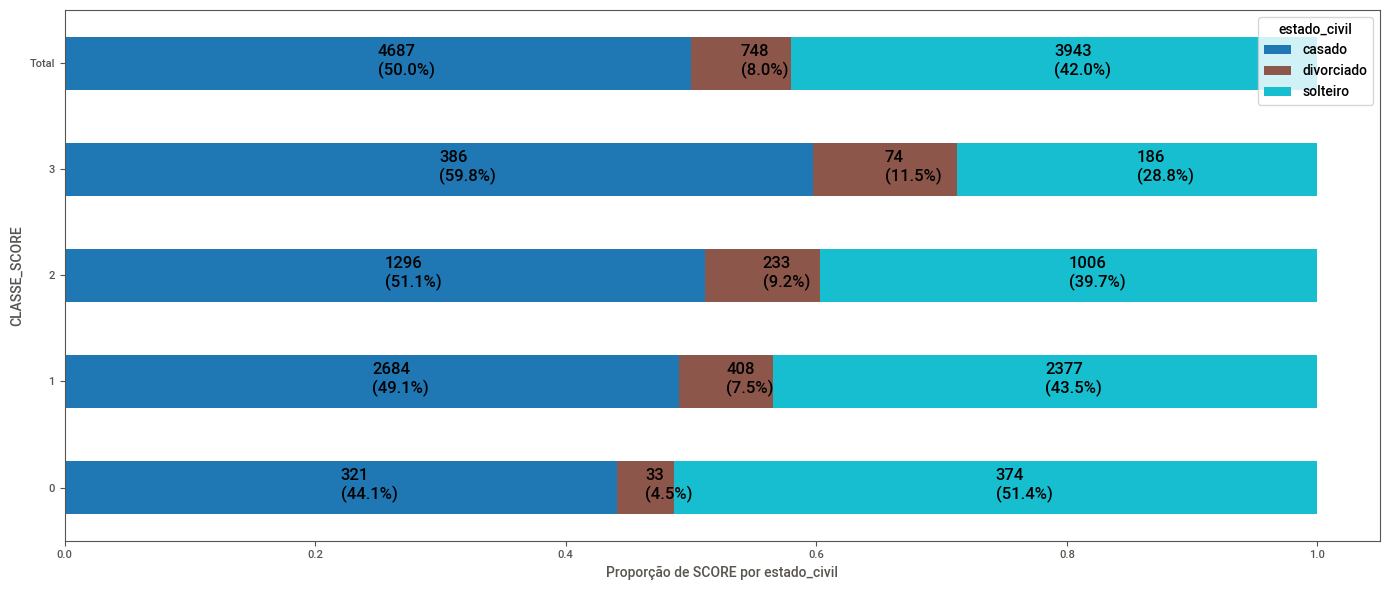

In [68]:
cross_tab_prop_estado_civil.plot(kind='barh',
                    stacked=True,
                    colormap='tab10',
                    figsize=(14, 6))

plt.xlabel("Proporção de SCORE por estado_civil")
plt.ylabel("CLASSE_SCORE")

for n, x in enumerate([*cross_tab_estado_civil.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_prop_estado_civil.loc[x],
                                          cross_tab_estado_civil.loc[x],
                                          cross_tab_prop_estado_civil.loc[x].cumsum()):

        plt.text(x=(y_loc - proportion) + (proportion / 2),
                 y=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)',
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.tight_layout()
plt.show()

##**Interpretação**

* A análise sugere que o estado civil está correlacionado com o score de crédito. Clientes casados tendem a ter melhores scores de crédito e são mais representados nas classes mais altas (2 e 3).
* Divorciados têm uma representação relativamente constante em todas as classes, mas são menos numerosos em comparação com casados e solteiros.

#### CLASSE_SCORE vs escola

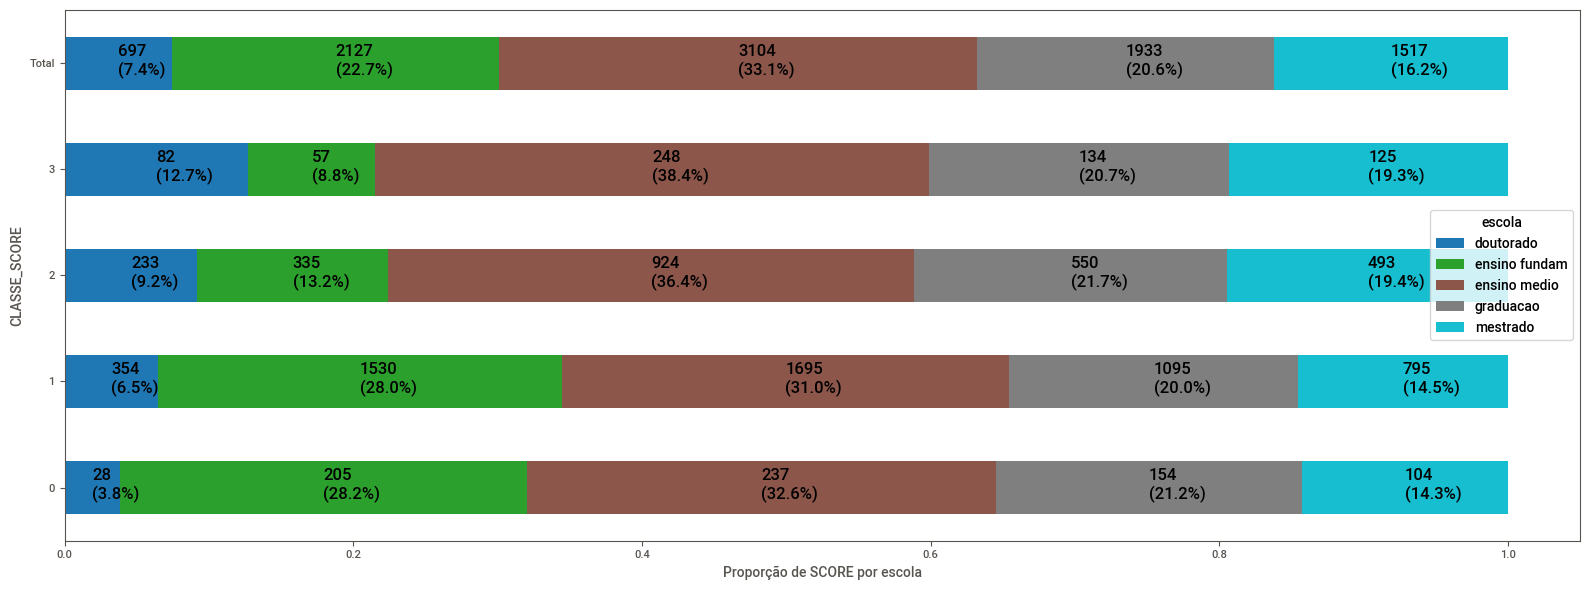

In [69]:
cross_tab_prop_escola.plot(kind='barh',
                    stacked=True,
                    colormap='tab10',
                    figsize=(16, 6))

plt.xlabel("Proporção de SCORE por escola")
plt.ylabel("CLASSE_SCORE")

for n, x in enumerate([*cross_tab_escola.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_prop_escola.loc[x],
                                          cross_tab_escola.loc[x],
                                          cross_tab_prop_escola.loc[x].cumsum()):

        plt.text(x=(y_loc - proportion) + (proportion / 2),
                 y=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)',
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.tight_layout()
plt.show()

##**Interpretação**

* A análise mostra que a maioria dos clientes com doutorado está concentrada nas classes de score mais altas, enquanto aqueles com ensino fundamental e médio estão mais presentes nas classes de score intermediárias a baixas.


#### CLASSE_SCORE vs trabalha

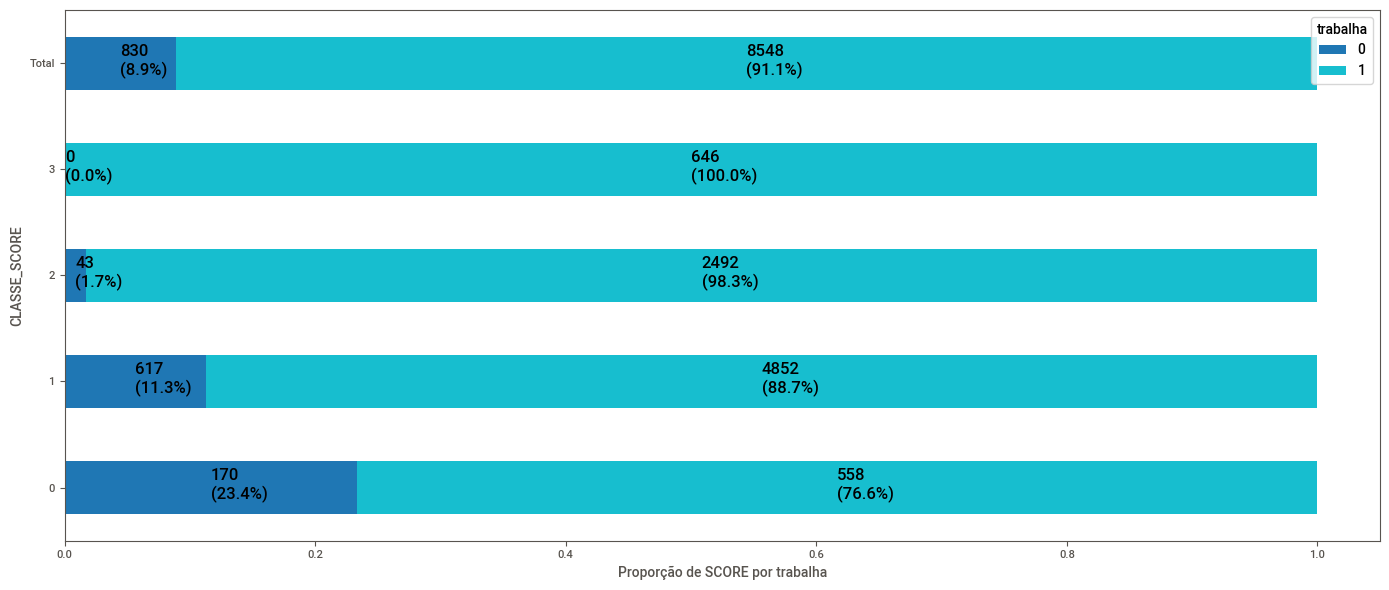

In [70]:
cross_tab_prop_trabalha.plot(kind='barh',
                    stacked=True,
                    colormap='tab10',
                    figsize=(14, 6))

plt.xlabel("Proporção de SCORE por trabalha")
plt.ylabel("CLASSE_SCORE")

for n, x in enumerate([*cross_tab_trabalha.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_prop_trabalha.loc[x],
                                          cross_tab_trabalha.loc[x],
                                          cross_tab_prop_trabalha.loc[x].cumsum()):

        plt.text(x=(y_loc - proportion) + (proportion / 2),
                 y=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)',
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.tight_layout()
plt.show()

##**Interpretação**

* A análise sugere que o status de emprego está fortemente correlacionado com o score de crédito. Clientes empregados tendem a ter scores de crédito mais altos e são mais representados nas classes mais altas (2 e 3).
* Clientes desempregados têm uma maior representação nas classes de score mais baixas (0 e 1), indicando uma correlação negativa entre estar desempregado e ter um score de crédito alto.

#### CLASSE_SCORE vs reg_moradia

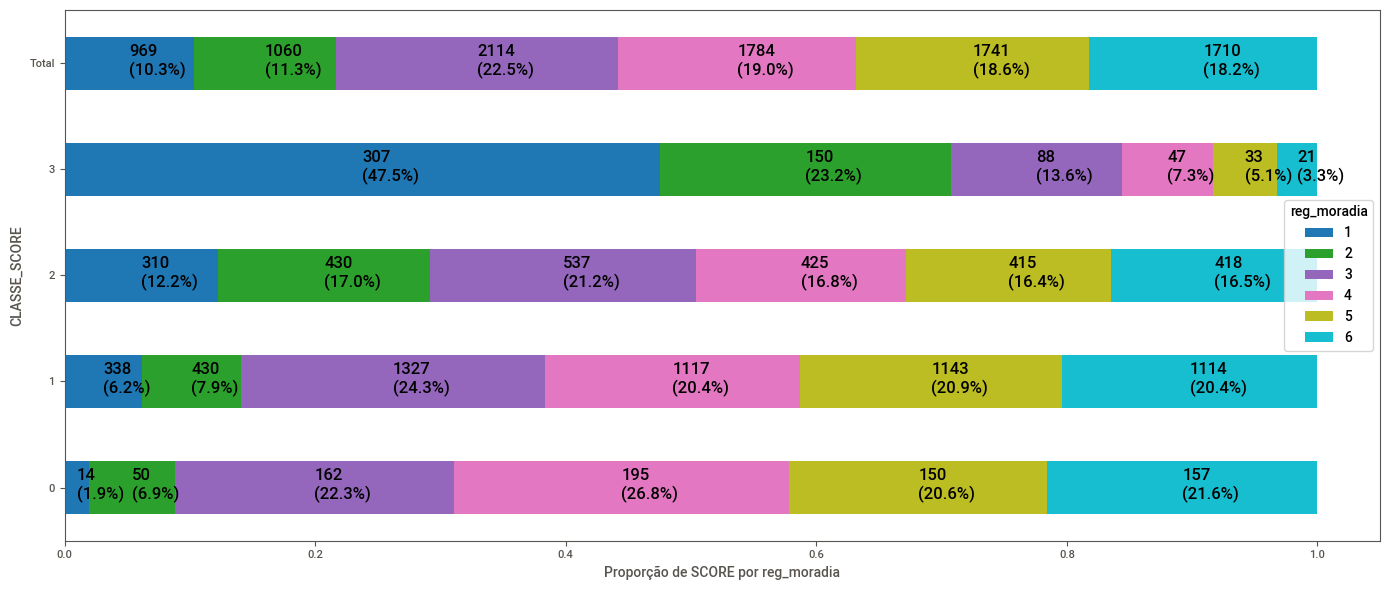

In [71]:
cross_tab_prop_reg_moradia.plot(kind='barh',
                    stacked=True,
                    colormap='tab10',
                    figsize=(14, 6))

plt.xlabel("Proporção de SCORE por reg_moradia")
plt.ylabel("CLASSE_SCORE")

for n, x in enumerate([*cross_tab_reg_moradia.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_prop_reg_moradia.loc[x],
                                          cross_tab_reg_moradia.loc[x],
                                          cross_tab_prop_reg_moradia.loc[x].cumsum()):

        plt.text(x=(y_loc - proportion) + (proportion / 2),
                 y=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)',
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.tight_layout()
plt.show()

##**Interpretação**

* A análise mostra que a maioria dos clientes das regiões 3, 4, 5 e 6 está concentrada nas classes de score intermediárias a baixas, enquanto aqueles da região 1 estão mais presentes nas classes de score altas.

#### CLASSE_SCORE vs casa_propria

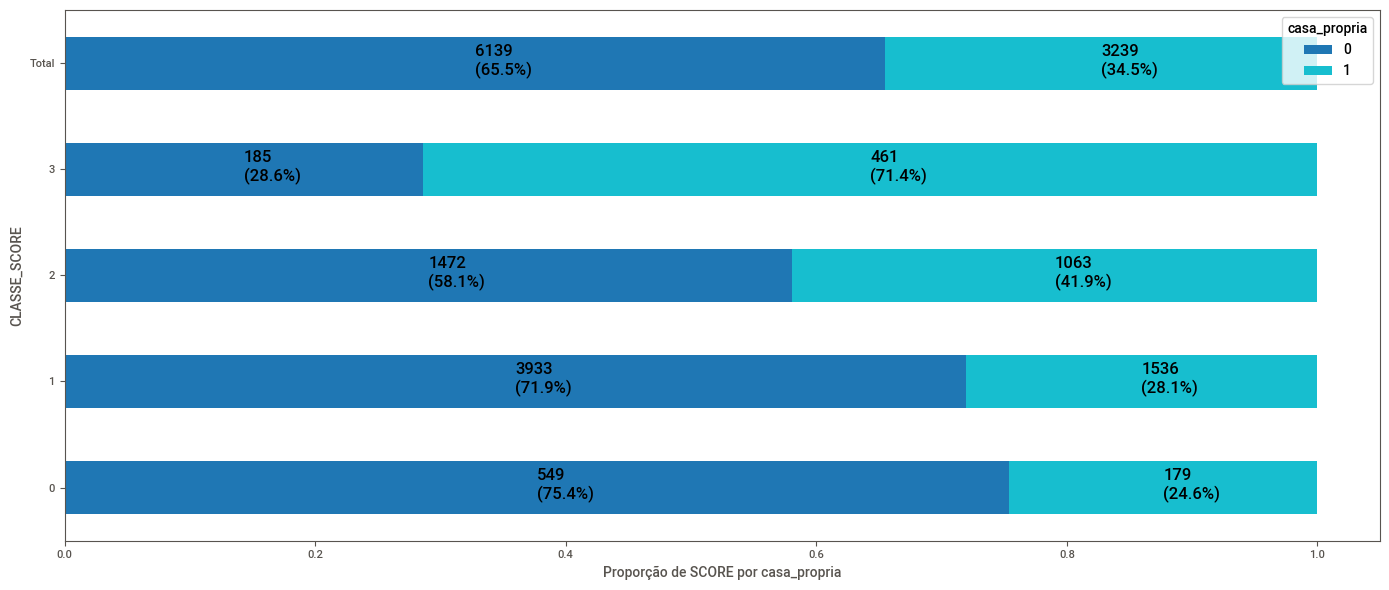

In [72]:
cross_tab_prop_casa_propria.plot(kind='barh',
                    stacked=True,
                    colormap='tab10',
                    figsize=(14, 6))

plt.xlabel("Proporção de SCORE por casa_propria")
plt.ylabel("CLASSE_SCORE")

for n, x in enumerate([*cross_tab_casa_propria.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_prop_casa_propria.loc[x],
                                          cross_tab_casa_propria.loc[x],
                                          cross_tab_prop_casa_propria.loc[x].cumsum()):

        plt.text(x=(y_loc - proportion) + (proportion / 2),
                 y=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)',
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.tight_layout()
plt.show()

##**Interpretação**

* A análise sugere que a posse de casa própria está fortemente correlacionada com o score de crédito. Clientes que possuem casa própria tendem a ter scores de crédito mais altos e são mais representados nas classes mais altas (2 e 3).

* Isso sugere que a posse de casa própria é um fator importante na avaliação do risco de crédito, onde possuir casa própria é visto positivamente pelo modelo preditivo de crédito que iremos construir

## __7) Análise Bivariada das Variáveis Quantitativas__

#### Ajuste do Grid para impressão

In [73]:
import matplotlib.gridspec as gridspec

class SeabornFig2Grid():

    def __init__(self, seaborngrid, fig,  subplot_spec):
        self.fig = fig
        self.sg = seaborngrid
        self.subplot = subplot_spec
        if isinstance(self.sg, sns.axisgrid.FacetGrid) or \
            isinstance(self.sg, sns.axisgrid.PairGrid):
            self._movegrid()
        elif isinstance(self.sg, sns.axisgrid.JointGrid):
            self._movejointgrid()
        self._finalize()

    def _movegrid(self):
        """ Move PairGrid or Facetgrid """
        self._resize()
        n = self.sg.axes.shape[0]
        m = self.sg.axes.shape[1]
        self.subgrid = gridspec.GridSpecFromSubplotSpec(n,m, subplot_spec=self.subplot)
        for i in range(n):
            for j in range(m):
                self._moveaxes(self.sg.axes[i,j], self.subgrid[i,j])

    def _movejointgrid(self):
        """ Move Jointgrid """
        h= self.sg.ax_joint.get_position().height
        h2= self.sg.ax_marg_x.get_position().height
        r = int(np.round(h/h2))
        self._resize()
        self.subgrid = gridspec.GridSpecFromSubplotSpec(r+1,r+1, subplot_spec=self.subplot)

        self._moveaxes(self.sg.ax_joint, self.subgrid[1:, :-1])
        self._moveaxes(self.sg.ax_marg_x, self.subgrid[0, :-1])
        self._moveaxes(self.sg.ax_marg_y, self.subgrid[1:, -1])

    def _moveaxes(self, ax, gs):
        #https://stackoverflow.com/a/46906599/4124317
        ax.remove()
        ax.figure=self.fig
        self.fig.axes.append(ax)
        self.fig.add_axes(ax)
        ax._subplotspec = gs
        ax.set_position(gs.get_position(self.fig))
        ax.set_subplotspec(gs)

    def _finalize(self):
        plt.close(self.sg.fig)
        self.fig.canvas.mpl_connect("resize_event", self._resize)
        self.fig.canvas.draw()

    def _resize(self, evt=None):
        self.sg.fig.set_size_inches(self.fig.get_size_inches())

### d) Gráfico de Dispersão

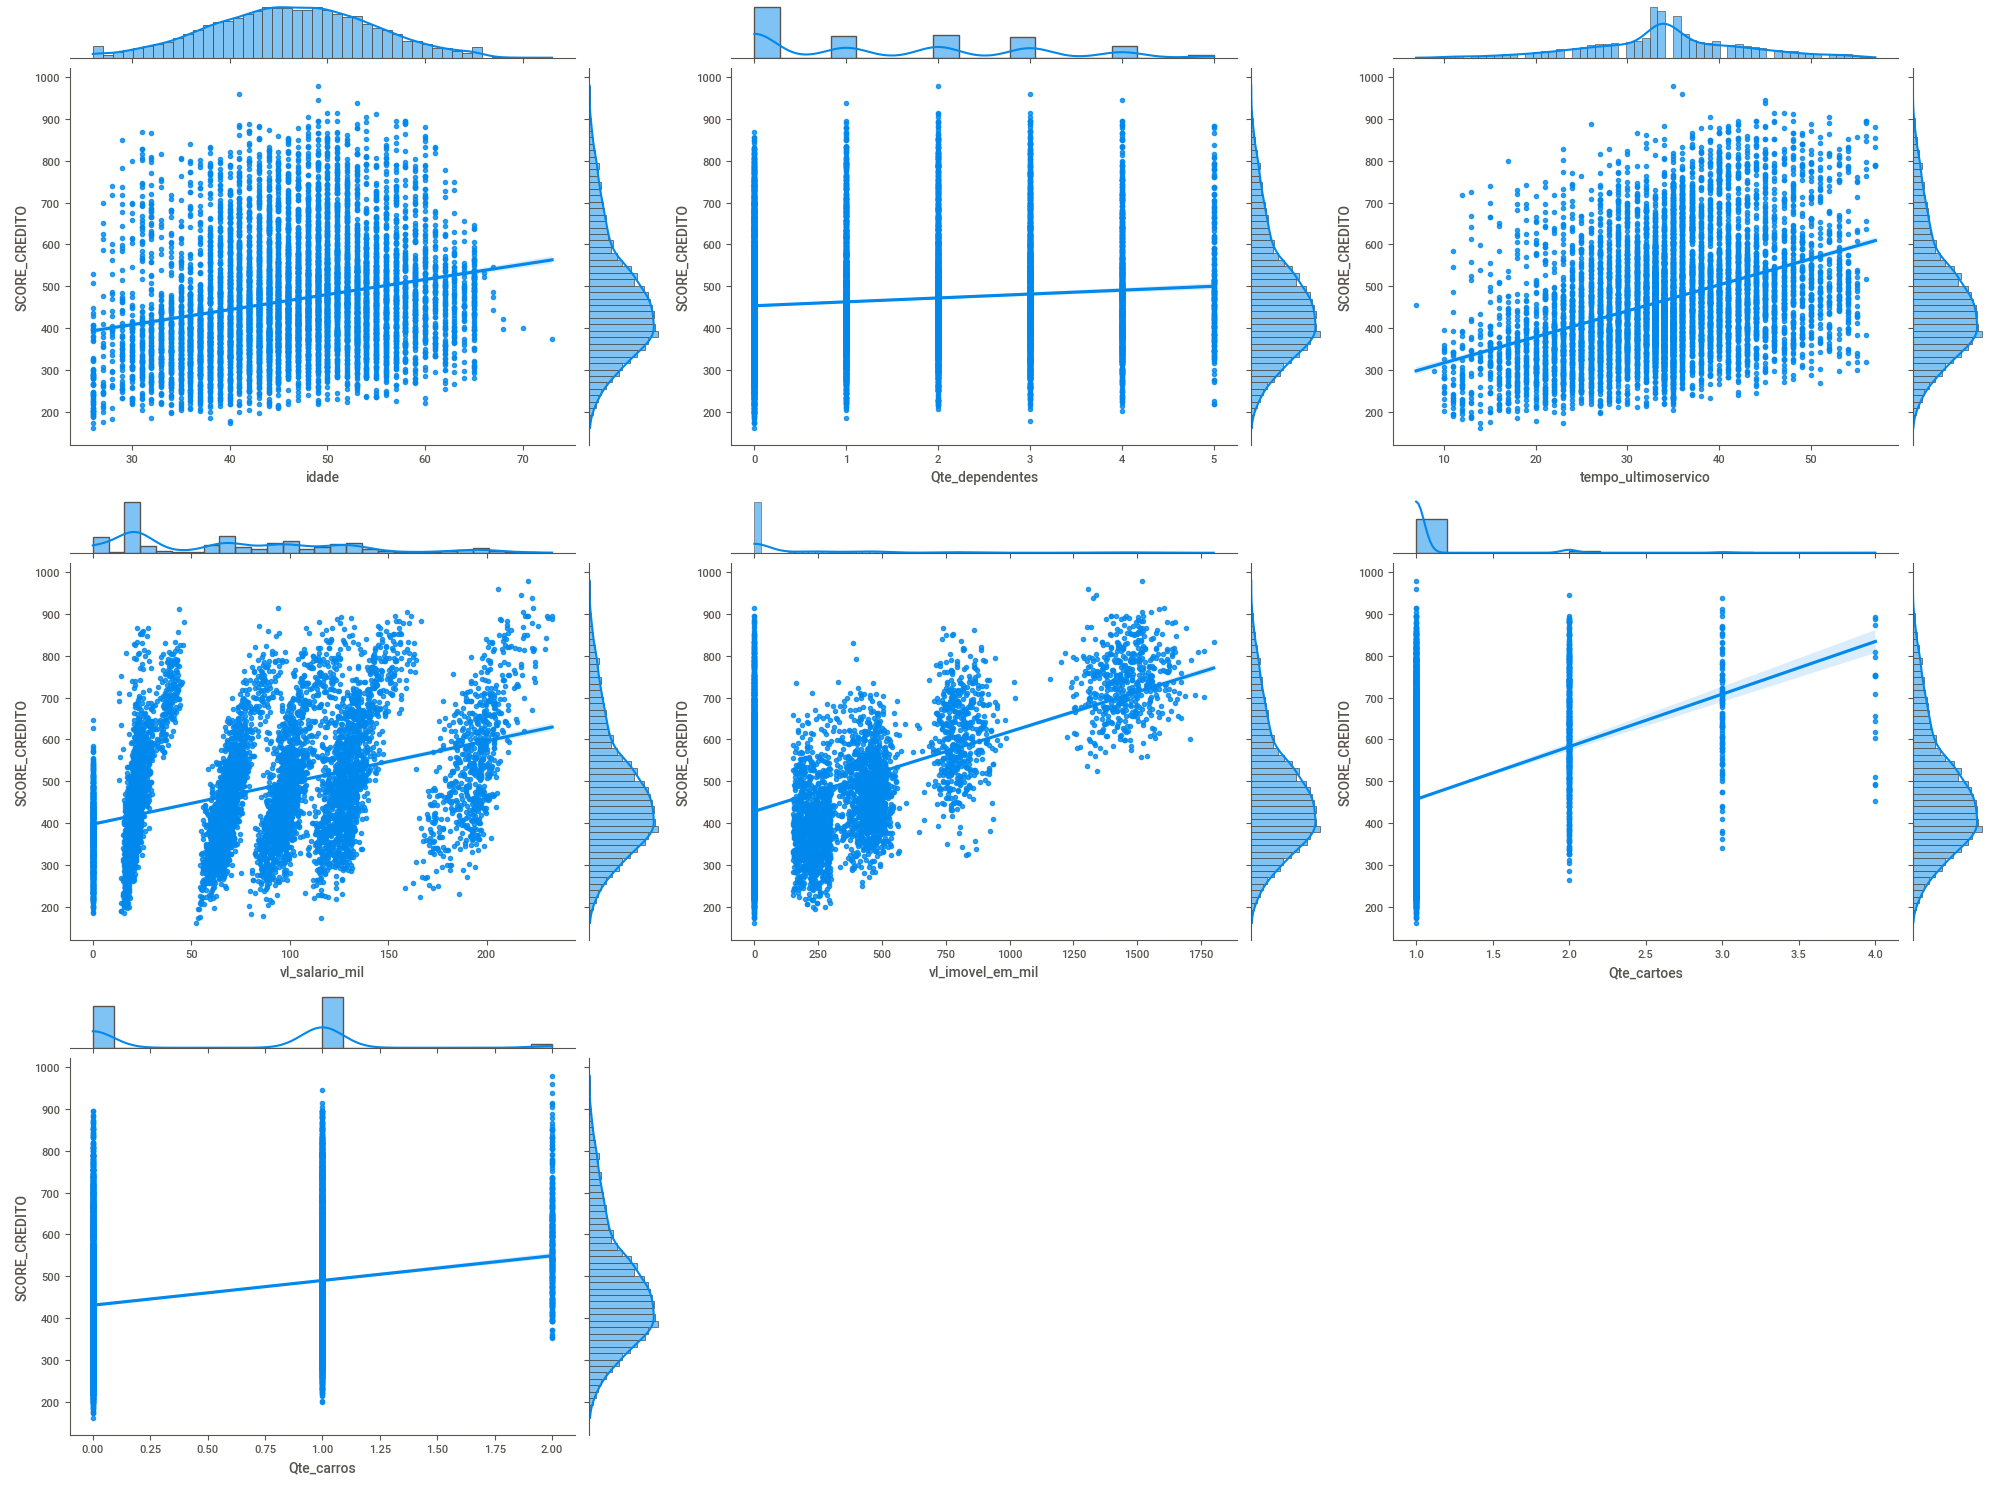

In [74]:
#Gráficos de dispersão - variáveis quantitativas
fig = plt.figure(figsize=(20,15))
gs = gridspec.GridSpec(3, 3)

for i, coluna in enumerate(quantitative_vars):
   SeabornFig2Grid(sns.jointplot(data=df, x=coluna, y="SCORE_CREDITO", kind='reg'), fig, gs[i])

gs.tight_layout(fig)
plt.show()

##**Interpretação**

**Gráfico 1: Idade vs. SCORE_CREDITO**
* A dispersão dos dados mostra uma correlação positiva
moderada entre idade e score de crédito.

* À medida que a idade aumenta, há uma tendência de aumento no score de crédito.

**Gráfico 2: Quantidade de Dependentes vs. SCORE_CREDITO**

* Não há uma correlação clara entre a quantidade de dependentes e o score de crédito.
* As linhas de tendência mostram uma inclinação mínima, indicando que a quantidade de dependentes não tem um impacto significativo no score de crédito.

**Gráfico 3: Tempo no Último Serviço vs. SCORE_CREDITO**

* Existe uma correlação positiva moderada entre o tempo no último serviço e o score de crédito.
* Clientes com mais tempo no último emprego tendem a ter scores de crédito mais altos, sugerindo que a estabilidade no emprego pode ser um fator importante na avaliação do risco de crédito.

**Gráfico 4: Valor do Salário (em mil) vs. SCORE_CREDITO**

* Há uma correlação positiva entre o valor do salário e o score de crédito.
* Clientes com salários mais altos tendem a ter scores de crédito mais altos.
* Isso indica que a capacidade de renda é um fator significativo na determinação do score de crédito.

**Gráfico 5: Valor do Imóvel (em mil) vs. SCORE_CREDITO**

* Existe uma correlação positiva entre o valor do imóvel e o score de crédito.
* Clientes com imóveis de maior valor tendem a ter scores de crédito mais altos.
* A posse de ativos valiosos, como imóveis, parece ser um indicador de maior capacidade de crédito.

**Gráfico 6: Quantidade de Cartões vs. SCORE_CREDITO**

* Há uma correlação positiva entre a quantidade de cartões e o score de crédito.
* Clientes com mais cartões de crédito tendem a ter scores de crédito mais altos.

**Gráfico 7: Quantidade de Carros vs. SCORE_CREDITO**

* Existe uma leve correlação positiva entre a quantidade de carros e o score de crédito.
* Clientes com mais carros tendem a ter scores de crédito ligeiramente mais altos.
* A posse de múltiplos veículos pode ser vista como um indicador de estabilidade financeira.

### e) Análise de Correlação de Pearson

**Correlação Positiva Moderada a Forte:** O valor do imóvel, o tempo no último serviço e o valor do salário são as variáveis que apresentam correlações positivas mais significativas com o score de crédito, indicando que esses fatores podem ser importantes na determinação do score.

**Correlação Positiva Fraca a Moderada:** A idade, a quantidade de cartões e a quantidade de carros também apresentam correlações positivas, mas com menor intensidade, sugerindo que esses fatores também contribuem para o score de crédito, mas de forma menos pronunciada.

In [75]:
# Calcular a correlação de Pearson entre cada variável quantitativa e SCORE_CREDITO
pearson_correlations = df[quantitative_vars + ['SCORE_CREDITO']].corr()['SCORE_CREDITO'].drop('SCORE_CREDITO')

# Exibir os resultados
print("Correlação de Pearson entre variáveis quantitativas e SCORE_CREDITO:\n")
print(pearson_correlations)

Correlação de Pearson entre variáveis quantitativas e SCORE_CREDITO:

idade                  0.218570
Qte_dependentes        0.102993
tempo_ultimoservico    0.385750
vl_salario_mil         0.414354
vl_imovel_em_mil       0.536724
Qte_cartoes            0.310265
Qte_carros             0.251007
Name: SCORE_CREDITO, dtype: float64


In [76]:
# HIPÓTESE 3: "Pessoas com mais dependentes costumam não ter capacidade de pagar suas dívidas" : NÃO. Conforme o número de dependentes cresce, o score também tende a crescer, com uma correlação positiva de 0.10.
df['Qte_dependentes'].corr(df['SCORE_CREDITO'])

0.10299288287257277

### f) Matriz de Correlação de Pearson

Matriz de correlação de Pearson:

                        idade  Qte_dependentes  tempo_ultimoservico  \
idade                1.000000        -0.061962             0.771579   
Qte_dependentes     -0.061962         1.000000            -0.039373   
tempo_ultimoservico  0.771579        -0.039373             1.000000   
vl_salario_mil       0.093935         0.047027             0.131396   
vl_imovel_em_mil    -0.025249         0.088717             0.086021   
Qte_cartoes         -0.014048        -0.010355             0.046299   
Qte_carros           0.049761         0.164368            -0.018422   
SCORE_CREDITO        0.218570         0.102993             0.385750   

                     vl_salario_mil  vl_imovel_em_mil  Qte_cartoes  \
idade                      0.093935         -0.025249    -0.014048   
Qte_dependentes            0.047027          0.088717    -0.010355   
tempo_ultimoservico        0.131396          0.086021     0.046299   
vl_salario_mil             1.000000          0

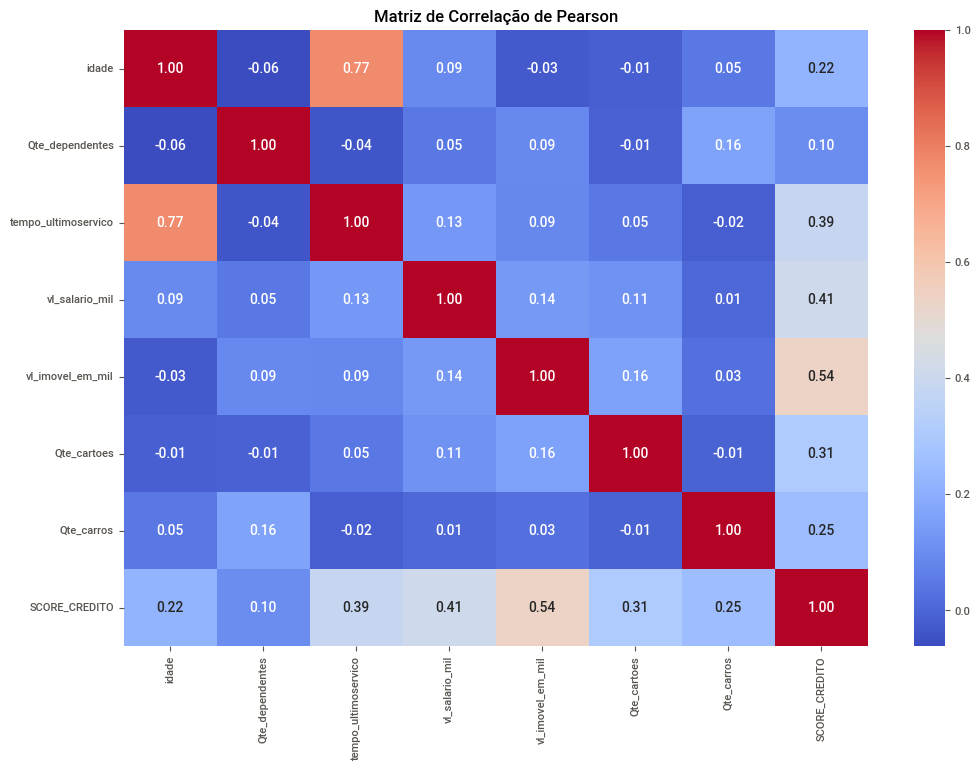

In [77]:
# Calcular a matriz de correlação de Pearson
correlation_matrix = df[quantitative_vars + ['SCORE_CREDITO']].corr()

# Exibir a matriz de correlação
print("Matriz de correlação de Pearson:\n")
print(correlation_matrix)

# Visualizar a matriz de correlação usando um heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação de Pearson')
plt.show()

##**Interpretação**

* **Correlação positiva moderada de idade com tempo_ultimoservico (0.77):** Indica que conforme a idade aumenta, o tempo no último serviço também tende a aumentar.

* **Correlação positiva moderada com SCORE_CREDITO com Valor do Imovel (0.54):** Indica que quanto maior o valor do imóvel, maior o score de crédito

* **Quantidade de Dependentes:** A quantidade de dependentes não mostra correlações fortes com outras variáveis, sugerindo que este fator não é um indicador significativo de comportamento de crédito.

## __8) Preencher o quadro conceitual estatístico__

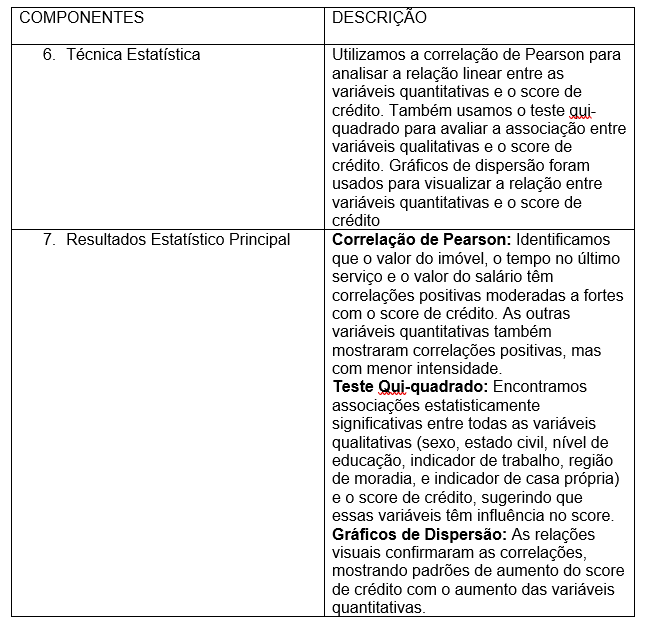

## __9) Construção do modelo preditivo__

### g) Selecionar as variaveis preditoras

In [78]:
# Com OneHotEncoding
X = pd.get_dummies(df.drop(['SCORE_CREDITO','CLASSE_SCORE','SCORE_ACIMA_500'], axis=1),columns=['estado_civil','escola'], dtype=int)

### h) Definir a variável resposta

In [79]:
y = df['SCORE_CREDITO']

### i)	Rodar o modelo de Regressão Linear Múltipla.

In [80]:
import statsmodels.api as sm
# Dividir os dados em conjunto de treinamento e validação
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Ajustar o modelo
sm_model = sm.OLS(y_train,X_train).fit()

model = LinearRegression()
model.fit(X_train, y_train)

# Prever os valores para o conjunto de validação
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
y_pred_test = sm_model.predict(X_test)

### j)	Análise de resíduos.

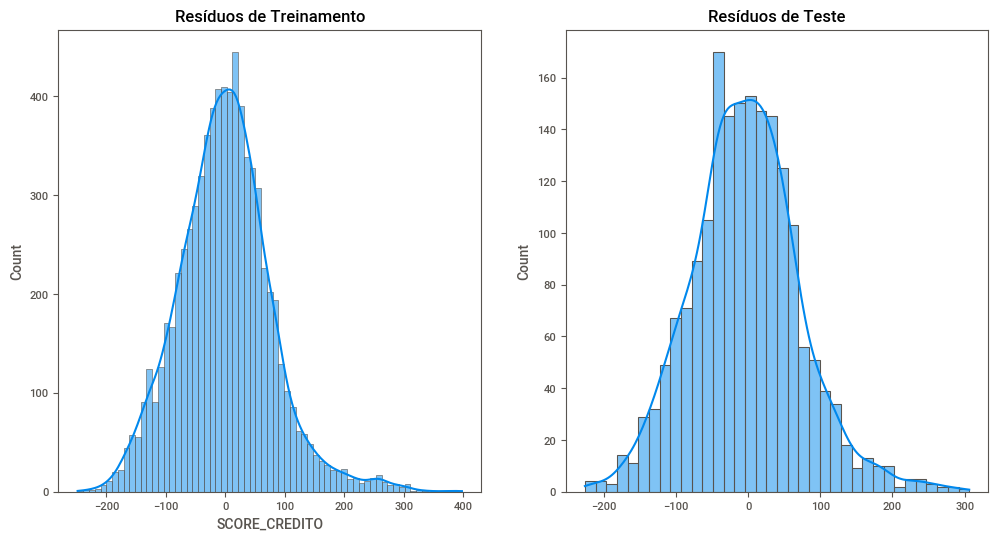

In [81]:
# Calcular os resíduos
residuos_train = y_train - y_pred_train
residuos_test = y_test - y_pred_test

# Plotar os resíduos
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(residuos_train, kde=True)
plt.title('Resíduos de Treinamento')

plt.subplot(1, 2, 2)
sns.histplot(residuos_test, kde=True)
plt.title('Resíduos de Teste')

plt.show()

##**Interpretação**

* Gráfico de resíduos de treinamento mostra uma distribuição aproximadamente normal, centrada em torno de zero.

* A maioria dos resíduos está próxima de zero, o que indica que o modelo está ajustando bem os dados de treinamento.

* A maioria dos resíduos do teste está próxima de zero, mas há uma maior dispersão em comparação com os resíduos de treinamento, o que é esperado, já que o modelo não foi ajustado diretamente nesses dados.

* A consistência entre as distribuições de resíduos de treinamento e teste é um bom sinal. Ambos mostram distribuições aproximadamente normais centradas em zero, o que indica que o modelo não está cometendo erros sistemáticos significativos.

### k)	Calcular as medidas de erros do modelo na amostra de desenvolvimento.

In [82]:
# Medidas de erro
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)

# Exibir os resultados
print(f'Treino - MSE: {mse_train}, MAE: {mae_train}, RMSE: {rmse_train}')

Treino - MSE: 6225.555596140182, MAE: 60.18147565264751, RMSE: 78.90219005921307


### l)	Calcular as medidas de erros do modelo na amostra de validação.

In [83]:
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r_squared = model.score(X,y)

print(f'Teste - MSE: {mse_test}, MAE: {mae_test}, RMSE: {rmse_test}, R-Squared: {r_squared}')

Teste - MSE: 5720.692561326136, MAE: 58.54996927041326, RMSE: 75.635260040051, R-Squared: 0.6568958463620782


In [84]:
# Intercepto do modelo
model.intercept_

146.1398224956796

In [85]:
#Coeficientes do modelo
list(zip(X.columns, model.coef_))

[('idade', -1.0401041183501223),
 ('Qte_dependentes', 5.24361845529212),
 ('tempo_ultimoservico', 5.704432571369515),
 ('trabalha', 43.123937377785325),
 ('vl_salario_mil', 0.568020646870348),
 ('reg_moradia', -8.00661573279471),
 ('casa_propria', -107.8782456266657),
 ('vl_imovel_em_mil', 0.22699595030222378),
 ('Qte_cartoes', 72.39315466152796),
 ('Qte_carros', 59.36911871663792),
 ('estado_civil_casado', -6.1861131495611055),
 ('estado_civil_divorciado', 14.017689019189348),
 ('estado_civil_solteiro', -7.831575869628269),
 ('escola_doutorado', 0.8675318170469095),
 ('escola_ensino fundam', -11.759346919762862),
 ('escola_ensino medio', 3.2720545216734687),
 ('escola_graduacao', -0.549666114683386),
 ('escola_mestrado', 8.169426695725857)]

In [86]:
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SCORE_CREDITO   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     877.2
Date:                Fri, 09 Aug 2024   Prob (F-statistic):               0.00
Time:                        17:09:33   Log-Likelihood:                -43415.
No. Observations:                7502   AIC:                         8.686e+04
Df Residuals:                    7485   BIC:                         8.698e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
idade                      -1.0401      0.182     -5.718      0.000      -1.397      -0.684
Qte_dependentes             5.2436      0.896      5.851      0.000       3.487       7.000
tempo_ultimoservico         5.7044      0.178     32.116      0.000       5.356       6.053
trabalha                   43.1239      3.509     12.289      0.000      36.245      50.003
vl_salario_mil              0.5680      0.019     29.883      0.000       0.531       0.605
reg_moradia                -8.0066      1.010     -7.928      0.000      -9.986      -6.027
casa_propria             -107.8782      3.798    -28.403      0.000    -115.324    -100.433
vl_imovel_em_mil            0.2270      0.004     57.604      0.000       0.219       0.235
Qte_cartoes                72.3932      2.831     25.572      0.000      66.844      77.943
Qte_carros                 59.3691      1.663     35.707      0.000      56.110      62.628
estado_civil_casado        85.1513      6.006     14.179      0.000      73.379      96.924
estado_civil_divorciado   105.3551      6.419     16.412      0.000      92.771     117.939
estado_civil_solteiro      83.5058      5.313     15.717      0.000      73.091      93.921
escola_doutorado           55.6700      4.559     12.212      0.000      46.734      64.606
escola_ensino fundam       43.0431      3.764     11.436      0.000      35.665      50.421
escola_ensino medio        58.0745      3.673     15.813      0.000      50.875      65.274
escola_graduacao           54.2528      3.796     14.293      0.000      46.812      61.694
escola_mestrado            62.9719      3.885     16.209      0.000      55.356      70.588
==============================================================================
Omnibus:                      452.910   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              763.304
Skew:                           0.477   Prob(JB):                    1.78e-166
Kurtosis:                       4.238   Cond. No.                     2.10e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.14e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### m)	Construir o simulador do modelo.

![image.png](attachment:image.png)

In [87]:
def simulador_modelo(idade, estado_civil, escola, Qte_dependentes, tempo_ultimoservico, trabalha,vl_salario_mil, reg_moradia, casa_propria, vl_imovel_em_mil,Qte_cartoes, Qte_carros):
    # Criar um DataFrame com os valores fornecidos
    input_data = pd.DataFrame({
        'idade': [idade],
        'estado_civil': [estado_civil],
        'escola': [escola],
        'Qte_dependentes': [Qte_dependentes],
        'tempo_ultimoservico': [tempo_ultimoservico],
        'trabalha': [trabalha],
        'vl_salario_mil': [vl_salario_mil],
        'reg_moradia': [reg_moradia],
        'casa_propria': [casa_propria],
        'vl_imovel_em_mil': [vl_imovel_em_mil],
        'Qte_cartoes': [Qte_cartoes],
        'Qte_carros': [Qte_carros]
    })

    input_data = pd.get_dummies(input_data,columns=['estado_civil','escola'], dtype=int)

    input_data = pd.concat([X.drop(X.index),input_data]).fillna(0)

    # Fazer a previsão
    predicao = model.predict(input_data)[0]

    return predicao

In [88]:
# Exemplo 1: Jovem desempregado
resultado1 = simulador_modelo(
    22,  # idade
    'solteiro',  # estado_civil
    'ensino medio',  # escola
    0,  # Qte_dependentes
    0,  # tempo_ultimoservico
    0,  # trabalha
    0,  # vl_salario_mil
    1,  # reg_moradia
    0,  # casa_propria
    0,  # vl_imovel_em_mil
    0,  # Qte_cartoes
    0   # Qte_carros
)
print(f"Score de crédito previsto (Jovem desempregado): {resultado1}")

# Exemplo 2: Trabalhador de baixa renda com muitos dependentes
resultado2 = simulador_modelo(
    40,  # idade
    'casado',  # estado_civil
    'ensino fundam',  # escola
    4,  # Qte_dependentes
    2,  # tempo_ultimoservico
    1,  # trabalha
    20,  # vl_salario_mil
    2,  # reg_moradia
    0,  # casa_propria
    0,  # vl_imovel_em_mil
    1,  # Qte_cartoes
    0   # Qte_carros
)
print(f"Score de crédito previsto (Trabalhador de baixa renda): {resultado2}")

# Exemplo 3: Recém-divorciado com dívidas
resultado3 = simulador_modelo(
    35,  # idade
    'divorciado',  # estado_civil
    'graduacao',  # escola
    2,  # Qte_dependentes
    1,  # tempo_ultimoservico
    1,  # trabalha
    50,  # vl_salario_mil
    1,  # reg_moradia
    0,  # casa_propria
    0,  # vl_imovel_em_mil
    3,  # Qte_cartoes
    1   # Qte_carros
)
print(f"Score de crédito previsto (Recém-divorciado com dívidas): {resultado3}")

# Exemplo 4: Estudante com trabalho temporário
resultado4 = simulador_modelo(
    23,  # idade
    'solteiro',  # estado_civil
    'graduacao',  # escola
    0,  # Qte_dependentes
    0,  # tempo_ultimoservico
    1,  # trabalha
    15,  # vl_salario_mil
    1,  # reg_moradia
    0,  # casa_propria
    0,  # vl_imovel_em_mil
    1,  # Qte_cartoes
    0   # Qte_carros
)
print(f"Score de crédito previsto (Estudante com trabalho temporário): {resultado4}")

# Exemplo 5: Aposentado com baixa renda
resultado5 = simulador_modelo(
    70,  # idade
    'divorciado',  # estado_civil
    'ensino fundam',  # escola
    0,  # Qte_dependentes
    0,  # tempo_ultimoservico
    0,  # trabalha
    10,  # vl_salario_mil
    3,  # reg_moradia
    0,  # casa_propria
    0,  # vl_imovel_em_mil
    0,  # Qte_cartoes
    0   # Qte_carros
)
print(f"Score de crédito previsto (Aposentado com baixa renda): {resultado5}")

# Exemplo 6: Profissional de meia-idade bem estabelecido
resultado6 = simulador_modelo(
    45,  # idade
    'casado',  # estado_civil
    'doutorado',  # escola
    2,  # Qte_dependentes
    15,  # tempo_ultimoservico
    1,  # trabalha
    200,  # vl_salario_mil
    5,  # reg_moradia
    1,  # casa_propria
    500,  # vl_imovel_em_mil
    2,  # Qte_cartoes
    2   # Qte_carros
)
print(f"Score de crédito previsto (Profissional bem estabelecido): {resultado6}")

# Exemplo 7: Jovem empreendedor
resultado7 = simulador_modelo(
    28,  # idade
    'solteiro',  # estado_civil
    'mestrado',  # escola
    0,  # Qte_dependentes
    3,  # tempo_ultimoservico
    1,  # trabalha
    100,  # vl_salario_mil
    2,  # reg_moradia
    0,  # casa_propria
    0,  # vl_imovel_em_mil
    2,  # Qte_cartoes
    1   # Qte_carros
)
print(f"Score de crédito previsto (Jovem empreendedor): {resultado7}")

# Exemplo 8: Pessoa de idade avançada com boa aposentadoria
resultado8 = simulador_modelo(
    75,  # idade
    'casado',  # estado_civil
    'graduacao',  # escola
    0,  # Qte_dependentes
    0,  # tempo_ultimoservico
    0,  # trabalha
    80,  # vl_salario_mil
    10,  # reg_moradia
    1,  # casa_propria
    300,  # vl_imovel_em_mil
    1,  # Qte_cartoes
    1   # Qte_carros
)
print(f"Score de crédito previsto (Aposentado com boa renda): {resultado8}")

Score de crédito previsto (Jovem desempregado): 110.6913948112274
Score de crédito previsto (Trabalhador de baixa renda): 229.83781016738908
Score de crédito previsto (Recém-divorciado com dívidas): 479.4628074296149
Score de crédito previsto (Estudante com trabalho temporário): 229.86697179888893
Score de crédito previsto (Aposentado com baixa renda): 57.25123558091687
Score de crédito previsto (Profissional bem estabelecido): 575.9095456871962
Score de crédito previsto (Jovem empreendedor): 422.53625436100685
Score de crédito previsto (Aposentado com boa renda): 118.75454161902398


# Interpretação final

* Os resultados do modelo preditivo de score de crédito demonstram uma capacidade significativa de diferenciação entre perfis de risco variados.

* O modelo atribuiu o score mais alto (575,91) ao profissional bem estabelecido, refletindo a estabilidade financeira e baixo risco associados a esse perfil. Em contraste, o aposentado com baixa renda recebeu o score mais baixo (57,25), indicando um alto risco percebido.

* O modelo também capturou pontos importantes, como a diferença entre o jovem empreendedor (422,54) e o estudante com trabalho temporário (229,87), sugerindo que fatores como educação avançada e maior renda têm um impacto positivo no score.

* A sensibilidade do modelo a variáveis como emprego, renda e ativos é evidente na diferença entre o jovem desempregado (110,69) e o divorciado com dívidas mas empregado (479,46).

* Estes resultados indicam que o modelo está alinhado com as expectativas gerais de avaliação de risco de crédito, considerando múltiplos fatores na sua previsão. No entanto, a ampla faixa de scores (de 57 a 576) sugere que pode ser necessário um ajuste de escala para alinhar com as faixas de score de crédito mais comumente utilizadas (300-850).

* Em suma, o modelo demonstra potencial para ser uma ferramenta valiosa na avaliação de risco de crédito, capturando efetivamente as características dos diferentes perfis financeiros, mas pode se beneficiar de refinamentos adicionais para otimizar sua precisão e aplicabilidade prática.